<a href="https://colab.research.google.com/github/Fedcmm/DLCV_Project/blob/main/DLCV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !wget https://uni-siegen.sciebo.de/s/HGdUkoNlW1Ub0Gx/download
# !unzip download
# !for i in $(seq 2 17); do unzip "WESAD/S${i}/S${i}_E4_Data.zip" -d "WESAD/S${i}/"; done

--2025-01-13 09:27:54--  https://uni-siegen.sciebo.de/s/HGdUkoNlW1Ub0Gx/download
Resolving uni-siegen.sciebo.de (uni-siegen.sciebo.de)... 128.176.1.2
Connecting to uni-siegen.sciebo.de (uni-siegen.sciebo.de)|128.176.1.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2249444501 (2.1G) [application/zip]
Saving to: ‘download’

download            100%[===================>]   2.09G  28.3MB/s    in 74s     

2025-01-13 09:29:10 (28.8 MB/s) - ‘download’ saved [2249444501/2249444501]

Archive:  download
   creating: WESAD/
   creating: WESAD/S10/
  inflating: WESAD/S10/S10.pkl       
  inflating: WESAD/S10/S10_E4_Data.zip  
  inflating: WESAD/S10/S10_quest.csv  
  inflating: WESAD/S10/S10_readme.txt  
  inflating: WESAD/S10/S10_respiban.txt  
   creating: WESAD/S11/
  inflating: WESAD/S11/S11.pkl       
  inflating: WESAD/S11/S11_E4_Data.zip  
  inflating: WESAD/S11/S11_quest.csv  
  inflating: WESAD/S11/S11_readme.txt  
  inflating: WESAD/S11/S11_respiban.txt  
   

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# import shutil
# shutil.copytree('/content/WESAD', '/content/gdrive/My Drive/WESAD')

In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/gdrive')

# Path to the WESAD folder in Google Drive
source_path = '/content/gdrive/My Drive/WESAD'

# Destination path in the Colab environment
# destination_path = '/content/WESAD'

# # Copy the WESAD folder from Drive to Colab
# shutil.copytree(source_path, destination_path)

# # Confirm the files were copied
# files = os.listdir(destination_path)
# print("Files in the WESAD folder:", files)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[1.49968504e+09 1.53116968e+09 1.55713654e+09 ... 1.37168029e+09
 1.41990330e+09 1.46259764e+09]


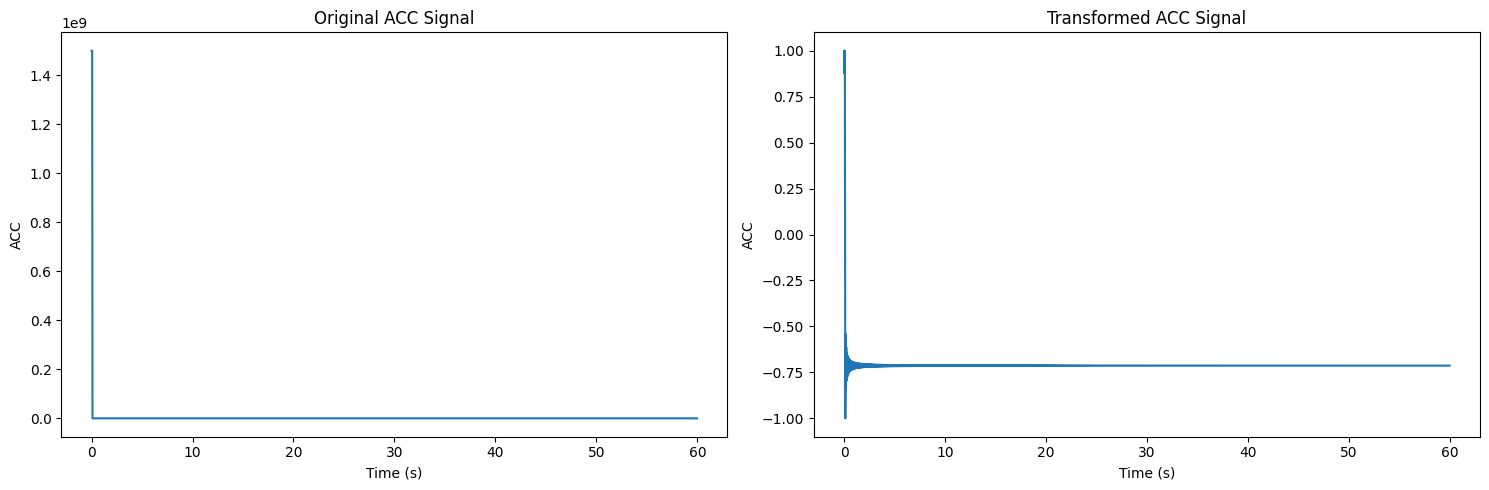

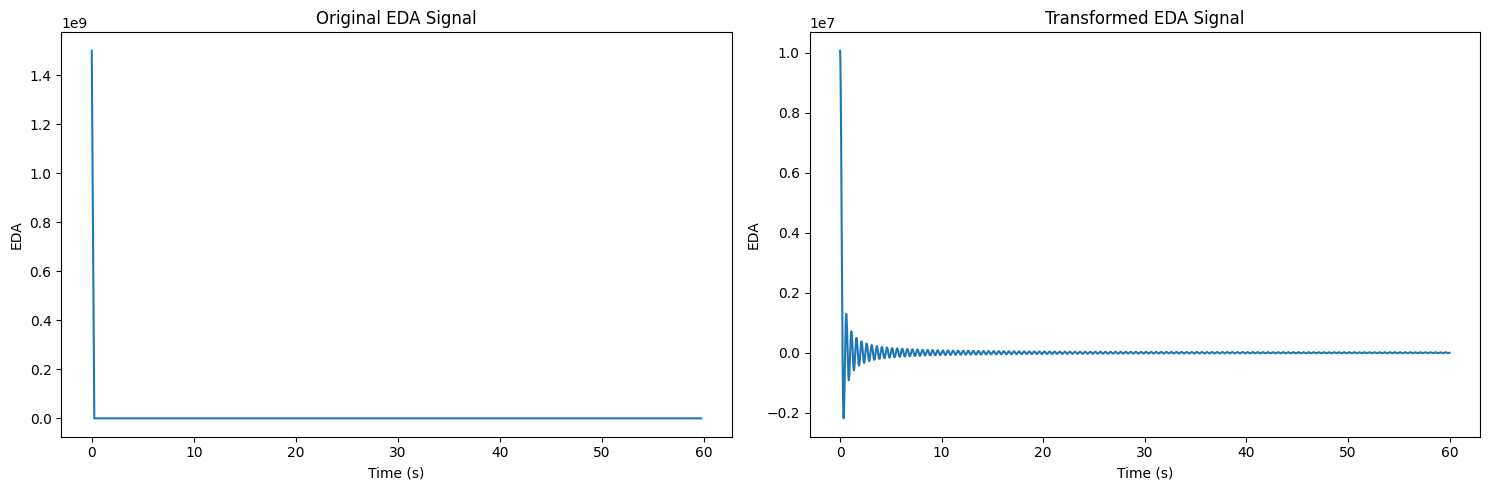

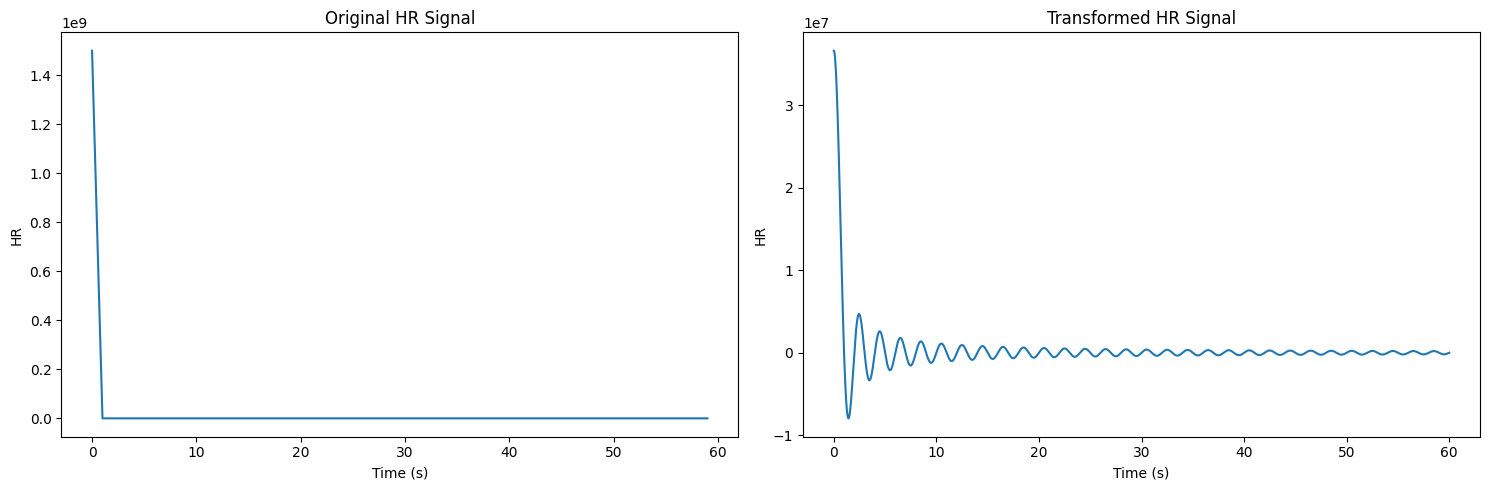

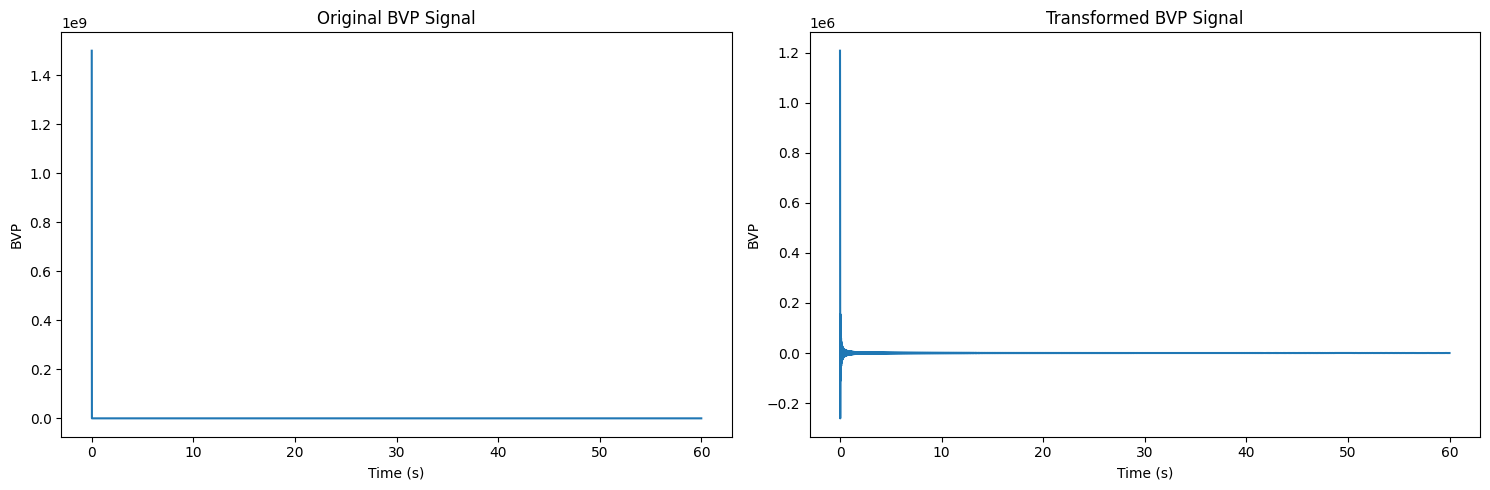

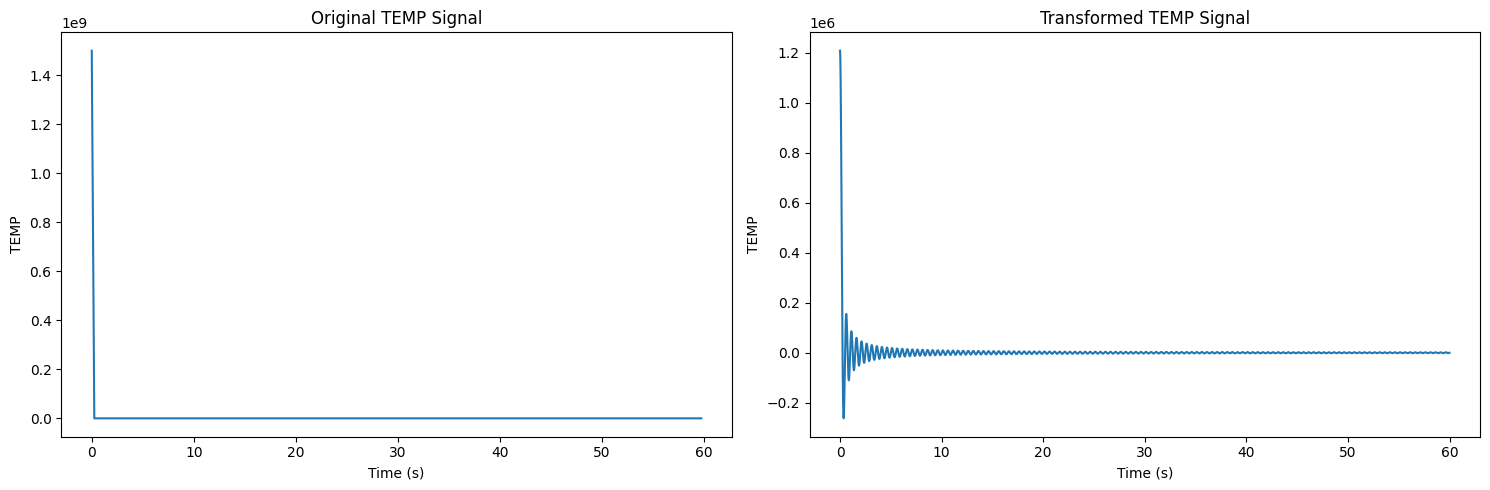

[[32.         32.         32.        ]
 [31.53564068 31.80881606 32.04634245]
 [30.70053922 31.40968975 32.26707185]
 ...
 [31.15772787 31.32354714 32.90847099]
 [31.8075238  31.75501979 32.43304338]
 [32.0902202  31.98171423 32.12921174]]


[[ 0.02009583]
 [ 0.03684998]
 [ 0.0536499 ]
 ...
 [-0.02677917]
 [-0.00682068]
 [ 0.01643372]]


<ipython-input-3-0a5f4ad40c1d>:67: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


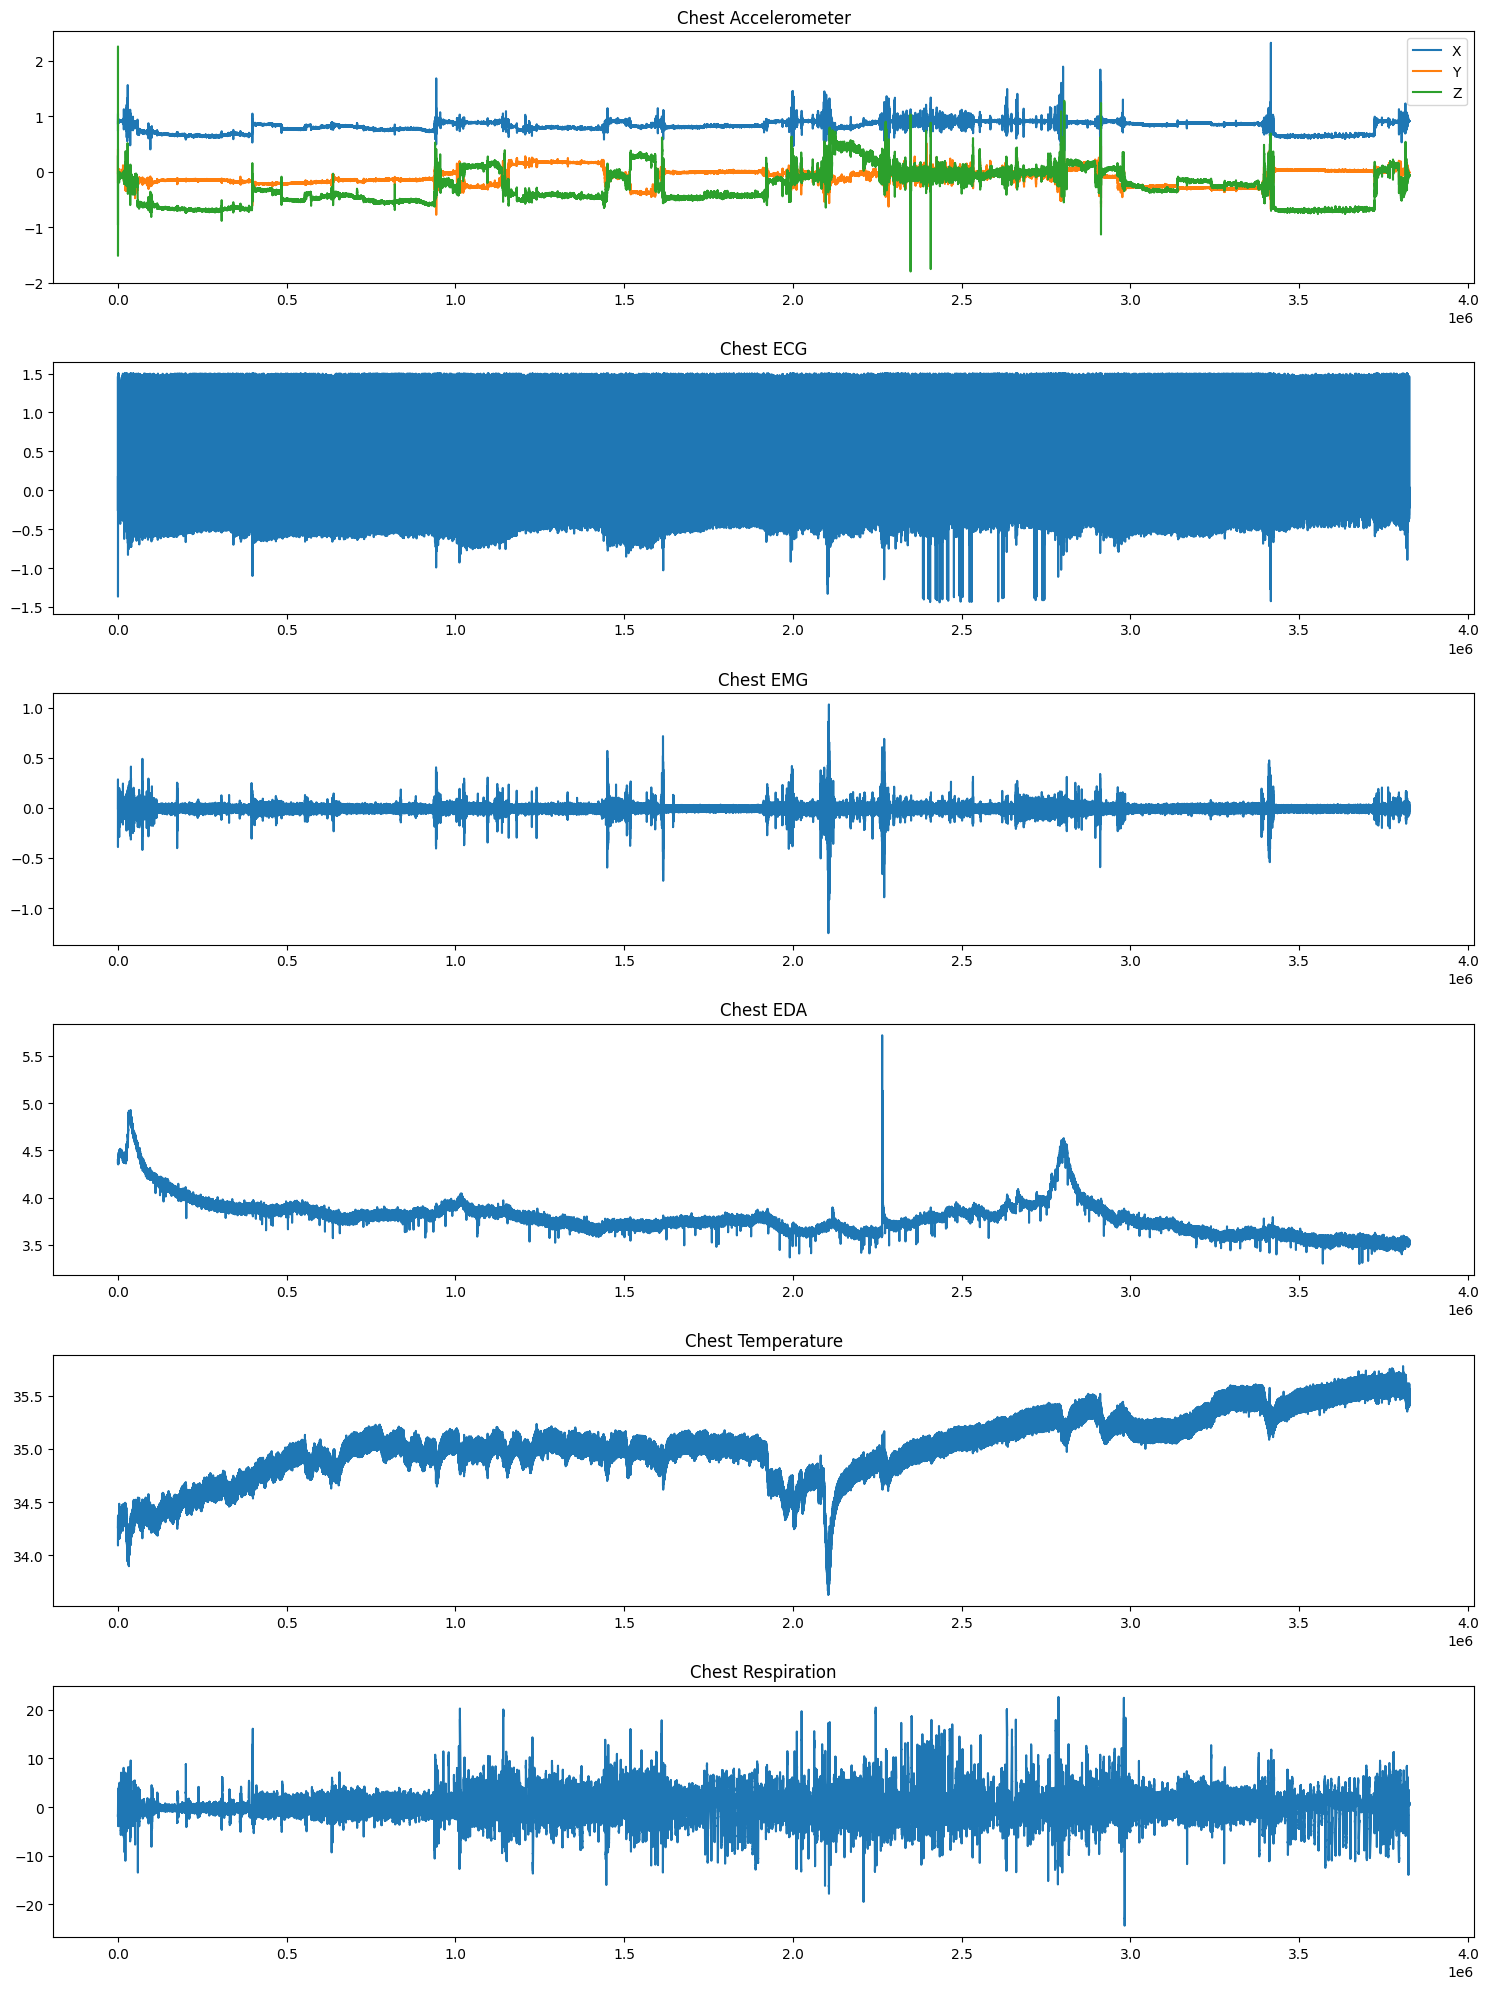

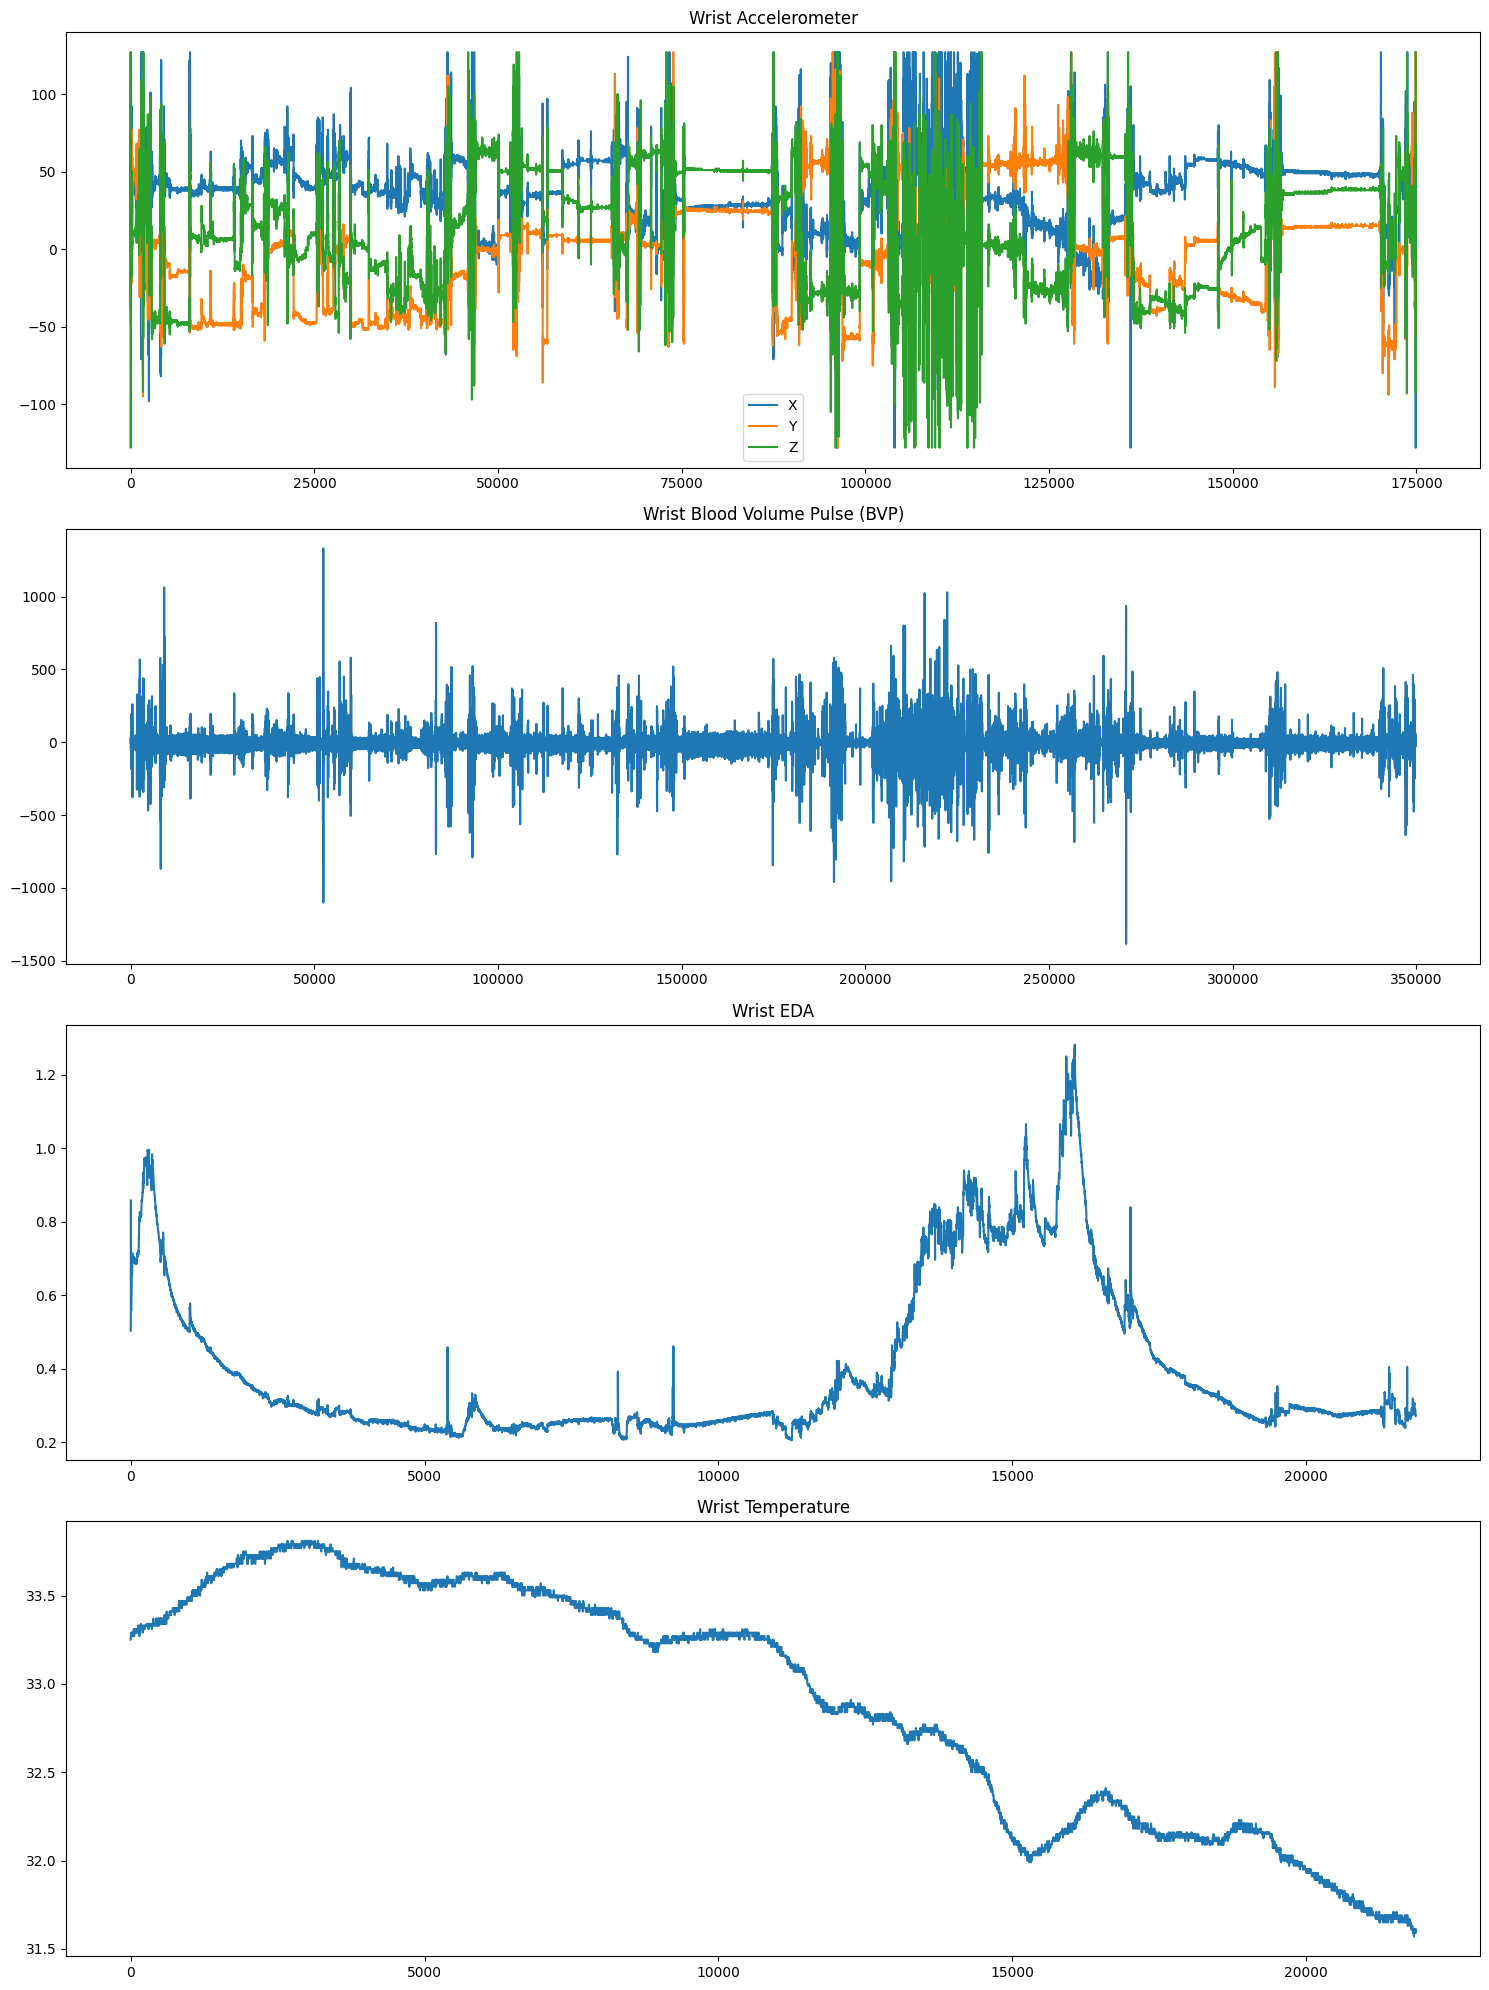

3826200
3826200


In [ ]:
import pandas as pd
import numpy as np

# Path to the text file
file_path = 'gdrive/My Drive/WESAD/S11/S11_respiban.txt'

# Read the data skipping the header and the first column
data = pd.read_csv(file_path, skiprows=3, delimiter='\t', usecols=range(2, 10))
df_resp = pd.DataFrame(data)
# Strip whitespace from column names
df_resp.columns = data.columns.str.strip()

df_resp.columns = ["ECG", "EDA", "EMG", "TEMP", "XYZ_X", "XYZ_Y", "XYZ_Z", "RESPIRATION"]

           ECG    EDA    EMG   TEMP  XYZ_X  XYZ_Y  XYZ_Z  RESPIRATION
0        30687  14212  33020  27569  36347  32117  29684        34635
1        30775  14181  32791  27574  36335  32116  29689        34647
2        30839  14206  32796  27571  36327  32131  29681        34631
3        30887  14176  32901  27570  36348  32129  29685        34631
4        31027  14191  33195  27563  36363  32119  29704        34631
...        ...    ...    ...    ...    ...    ...    ...          ...
4287112  36680  19311  30975  26601  37414  32735  31854        34583
4287113  36463  19305  32161  26611  37423  32743  31839        34579
4287114  36156  19301  32771  26643  37415  32741  31823        34557
4287115  36104  19300  33127  26615  37415  32747  31827        34539
4287116  35960  19295  33124  26605  37409  32741  31831        34555

[4287117 rows x 8 columns]


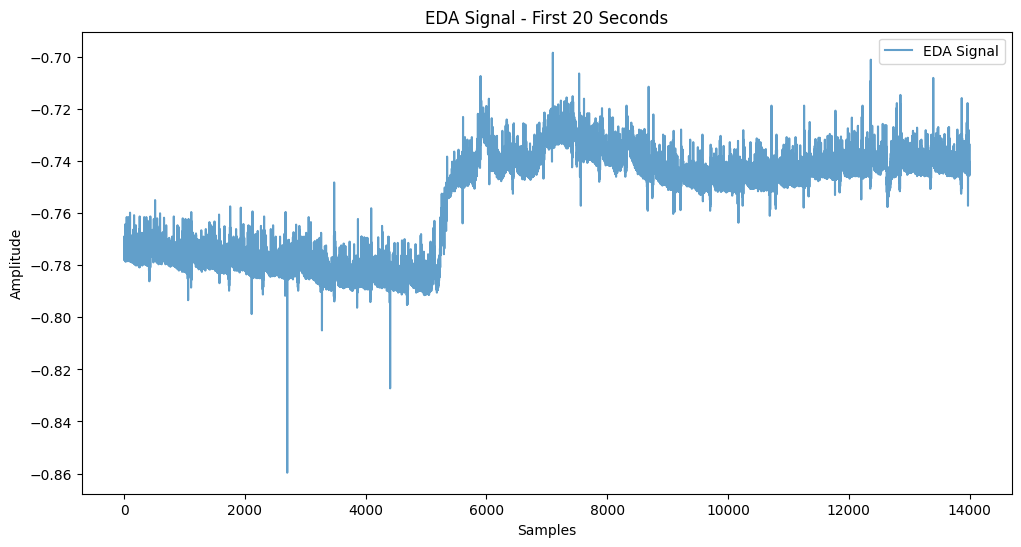

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import resample
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler

# Path to the text file
file_path = 'gdrive/My Drive/WESAD/S17/S17_respiban.txt'

# Read the data skipping the header and the first column
data = pd.read_csv(file_path, skiprows=3, delimiter='\t', usecols=range(2, 10))
df_resp = pd.DataFrame(data)
# Strip whitespace from column names
df_resp.columns = data.columns.str.strip()

df_resp.columns = ["ECG", "EDA", "EMG", "TEMP", "XYZ_X", "XYZ_Y", "XYZ_Z", "RESPIRATION"]
# Define transformation functions
vcc = 3
chan_bit = 2**16

def transform_ecg(signal):
    return (signal / chan_bit - 0.5) * vcc

def transform_eda(signal):
    return ((signal / chan_bit) * vcc) / 0.12

def transform_emg(signal):
    return (signal / chan_bit - 0.5) * vcc

def transform_temp(signal):
    vout = (signal * vcc) / (chan_bit - 1)
    rntc = (10**4 * vout) / (vcc - vout)
    return -273.15 + 1 / (1.12764514e-3 + 2.34282709e-4 * np.log(rntc) + 8.77303013e-8 * np.log(rntc)**3)

def transform_xyz(signal):
    Cmin, Cmax = 28000, 38000
    return (signal - Cmin) / (Cmax - Cmin) * 2 - 1

def transform_respiration(signal):
    return (signal / chan_bit - 0.5) * 100

df_resp['ECG'] = transform_ecg(df_resp['ECG'])
df_resp['EDA'] = transform_eda(df_resp['EDA'])
df_resp['EMG'] = transform_emg(df_resp['EMG'])
df_resp['TEMP'] = transform_temp(df_resp['TEMP'])
df_resp['XYZ_X'] = transform_xyz(df_resp['XYZ_X'])
df_resp['XYZ_Y'] = transform_xyz(df_resp['XYZ_Y'])
df_resp['XYZ_Z'] = transform_xyz(df_resp['XYZ_Z'])
df_resp['RESPIRATION'] = transform_respiration(df_resp['RESPIRATION'])




def butter_bandpass(lowcut, highcut, fs, order=4):
    """
    Crea un filtro passa banda Butterworth.
    :param lowcut: Frequenza di taglio inferiore (Hz)
    :param highcut: Frequenza di taglio superiore (Hz)
    :param fs: Frequenza di campionamento (Hz)
    :param order: Ordine del filtro
    :return: Coefficienti del filtro
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    """
    Applica un filtro passa banda Butterworth a un segnale.
    :param data: Segnale da filtrare
    :param lowcut: Frequenza di taglio inferiore (Hz)
    :param highcut: Frequenza di taglio superiore (Hz)
    :param fs: Frequenza di campionamento (Hz)
    :param order: Ordine del filtro
    :return: Segnale filtrato
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b , a = b , a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Parametri del filtro
lowcut = 0.5  # Frequenza di taglio inferiore (Hz)
highcut = 45.0  # Frequenza di taglio superiore (Hz)
fs = 700  # Frequenza di campionamento (Hz), adatta in base al tuo dataset

# Applicazione del filtro al segnale ECG
df_resp['ECG'] = apply_bandpass_filter(df_resp['ECG'], lowcut, highcut, fs, order=4)
df_resp['EMG'] = apply_bandpass_filter(df_resp['EMG'], lowcut, highcut, fs, order=4)

# Crea l'istanza del MinMaxScaler con il range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))

# Seleziona le colonne da normalizzare (escluse le colonne che non devono essere normalizzate)
columns_to_normalize = ['ECG', 'EDA', 'EMG', 'TEMP', 'XYZ_X', 'XYZ_Y', 'XYZ_Z', 'RESPIRATION']

# Applica la normalizzazione Min-Max su tutte le colonne selezionate
df_resp[columns_to_normalize] = scaler.fit_transform(df_resp[columns_to_normalize])
# Define the duration in seconds
duration = 20

# Calculate the number of samples for the first 20 seconds (700 Hz sampling rate)
num_samples = fs * duration

# Slice the DataFrame for the first 20 seconds of data
df_20s = df_resp.iloc[:num_samples]

# Plot the ECG signal for the first 20 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_20s['EDA'], label='EDA Signal', alpha=0.7)
plt.title('EDA Signal - First 20 Seconds')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


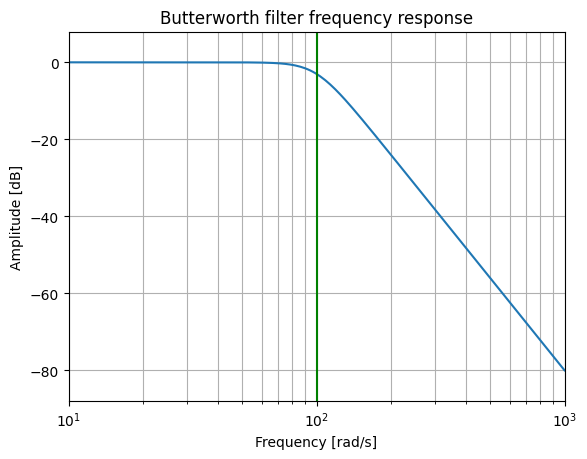

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

          ACC_X   ACC_Y   ACC_Z       ECG       EMG       EDA       Temp  \
0        0.7674  0.4226  1.7662  0.020096 -0.013870  6.607437  33.520264   
1        0.7326  0.2878  1.7234  0.036850 -0.002014  6.603241  33.494537   
2        0.6894  0.1146  1.5550  0.053650 -0.007599  6.605530  33.508148   
3        0.6646 -0.0626  1.3322  0.052780 -0.026505  6.611252  33.491516   
4        0.6590 -0.2322  1.0834  0.035751 -0.040421  6.609726  33.524780   
...         ...     ...     ...       ...       ...       ...        ...   
3663095  0.8854  0.0582 -0.3068 -0.027145 -0.045914  6.463242  35.029724   
3663096  0.8830  0.0570 -0.3114 -0.032822 -0.047928  6.377792  34.989563   
3663097  0.8814  0.0550 -0.3190 -0.026779 -0.045502  6.378174  35.014282   
3663098  0.8766  0.0546 -0.3256 -0.006821 -0.041977  6.377029  35.018921   
3663099  0.8714  0.0554 -0.3284  0.016434 -0.020828  6.380081  35.023529   

             Resp  ACC_X  ACC_Y  ACC_Z    BVP       EDA   Temp  0  
0        2.120972 -

KeyboardInterrupt: 

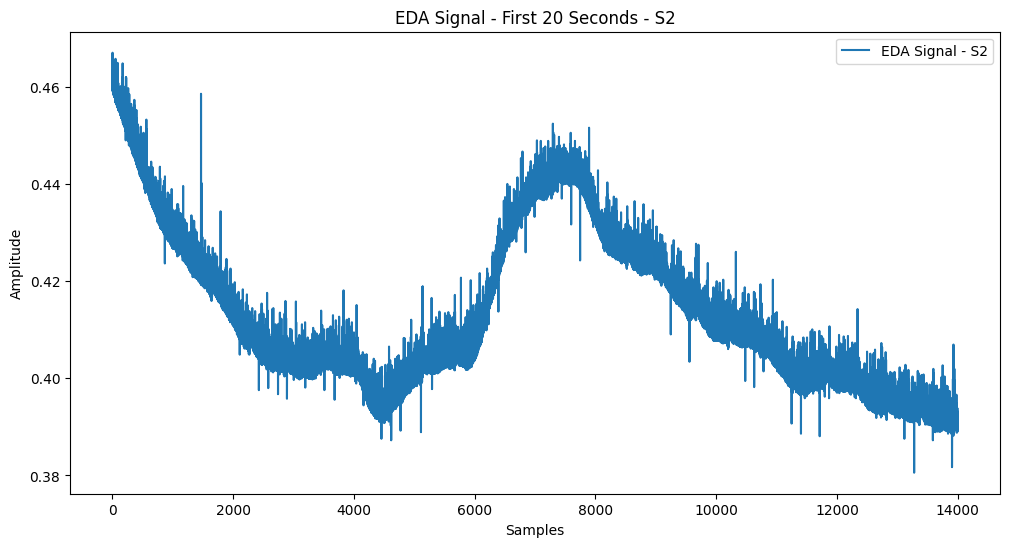

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


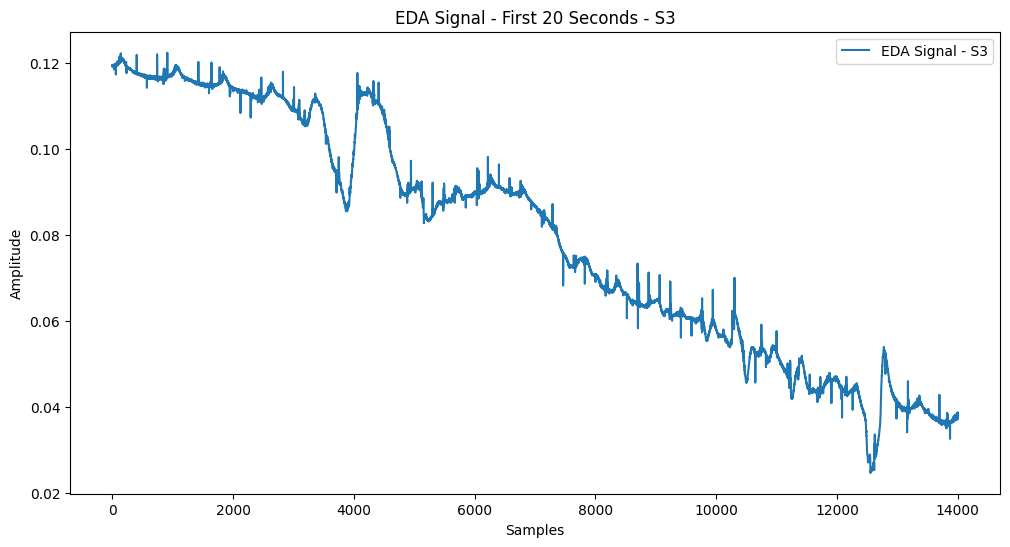

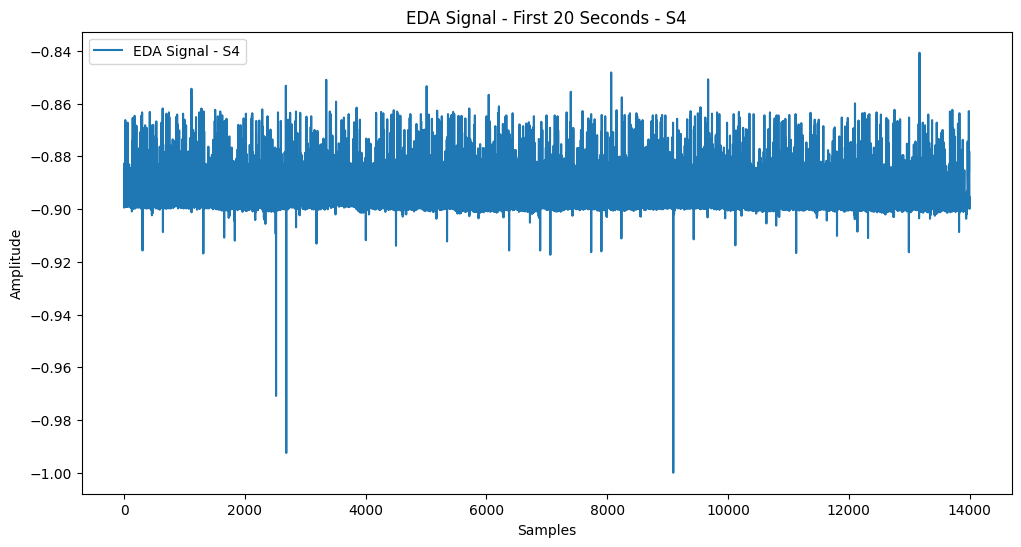

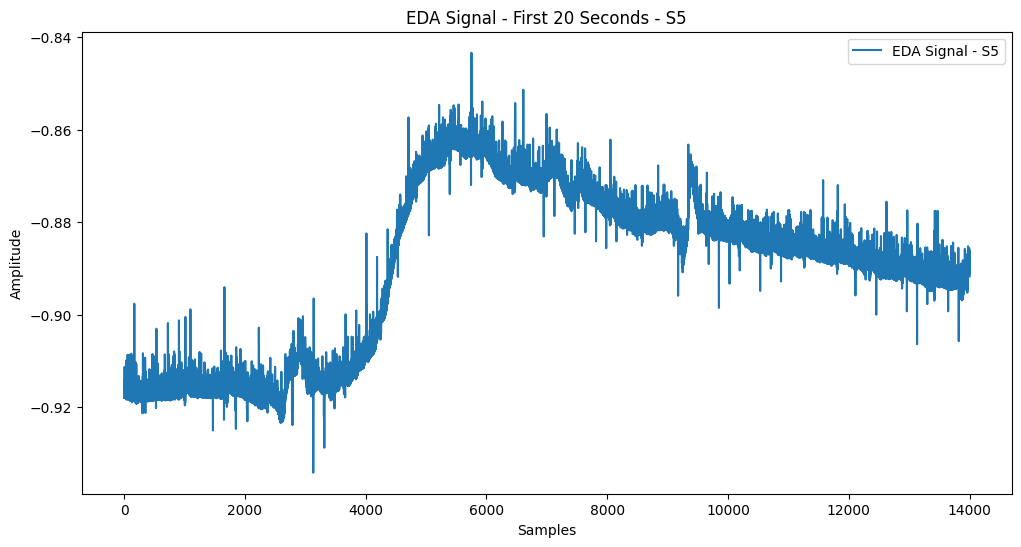

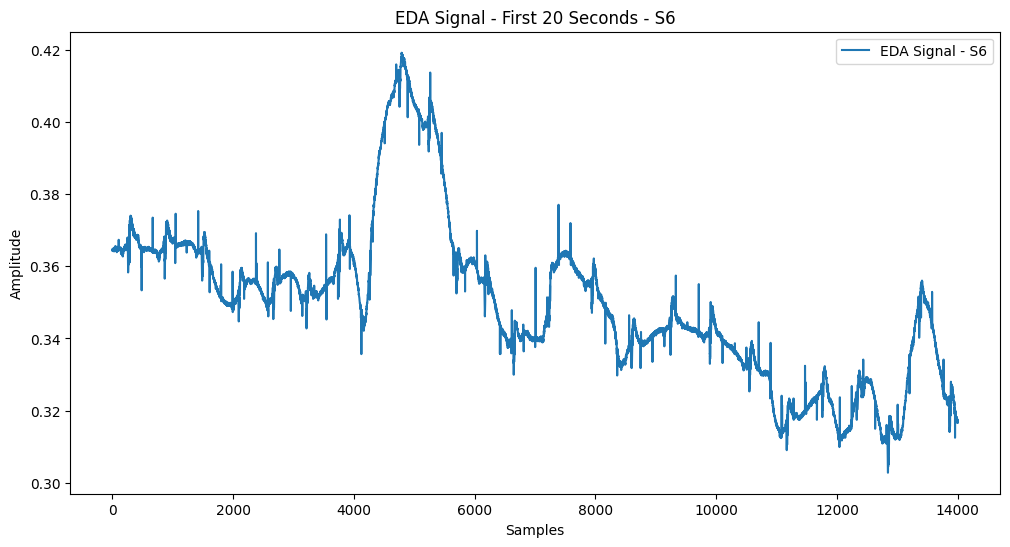

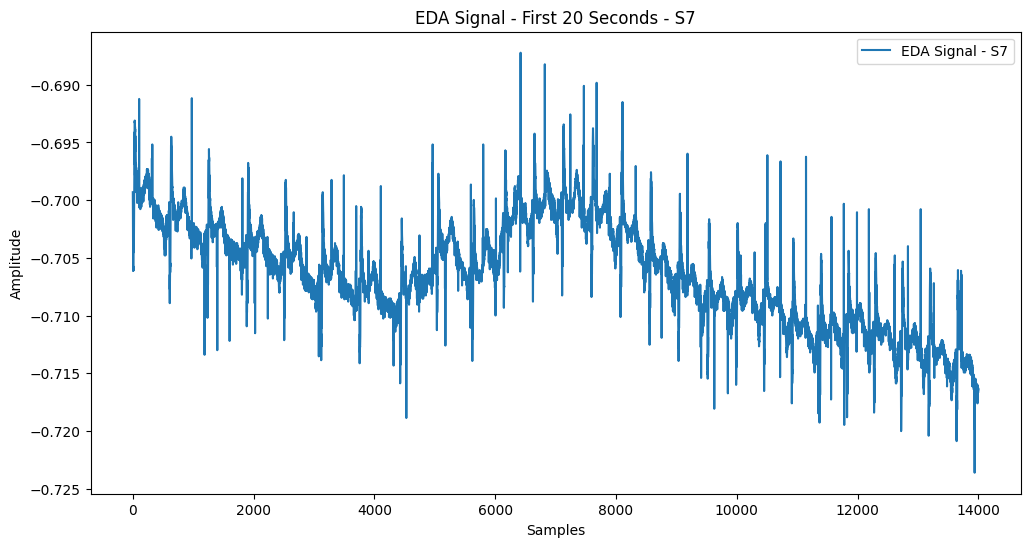

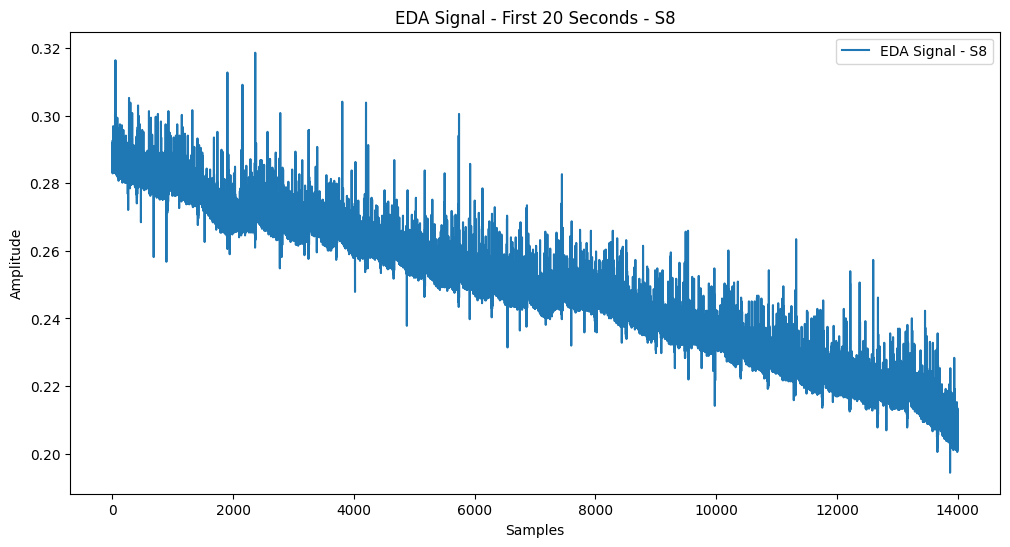

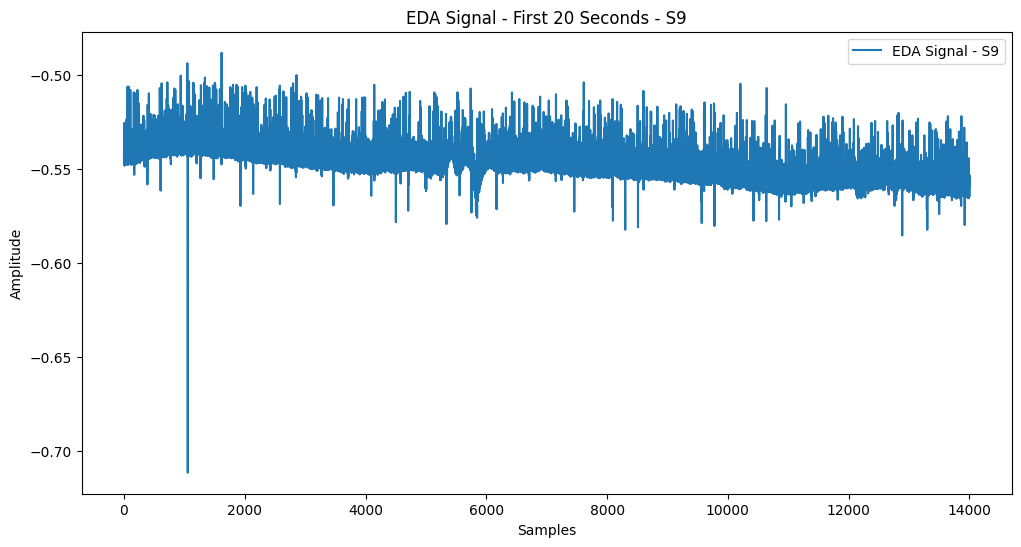

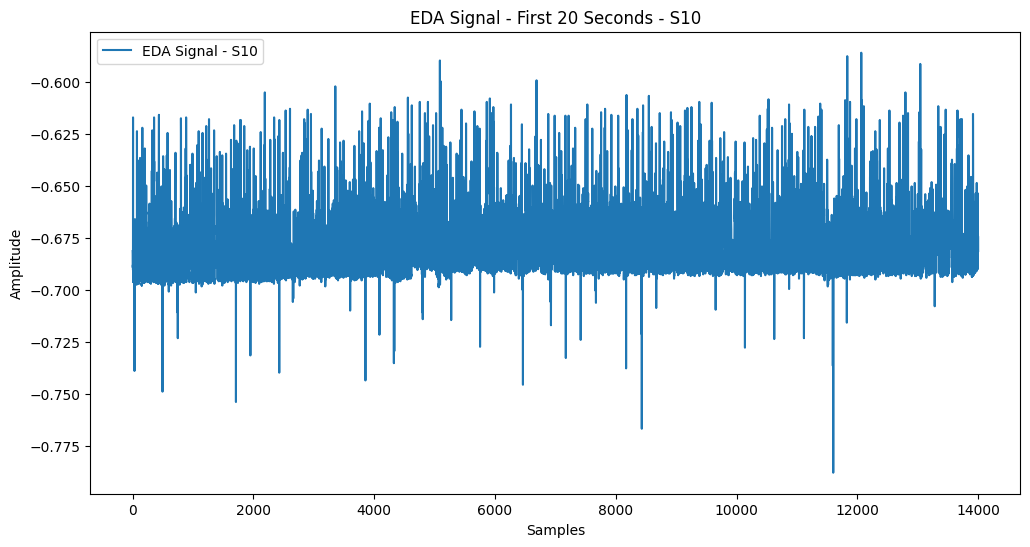

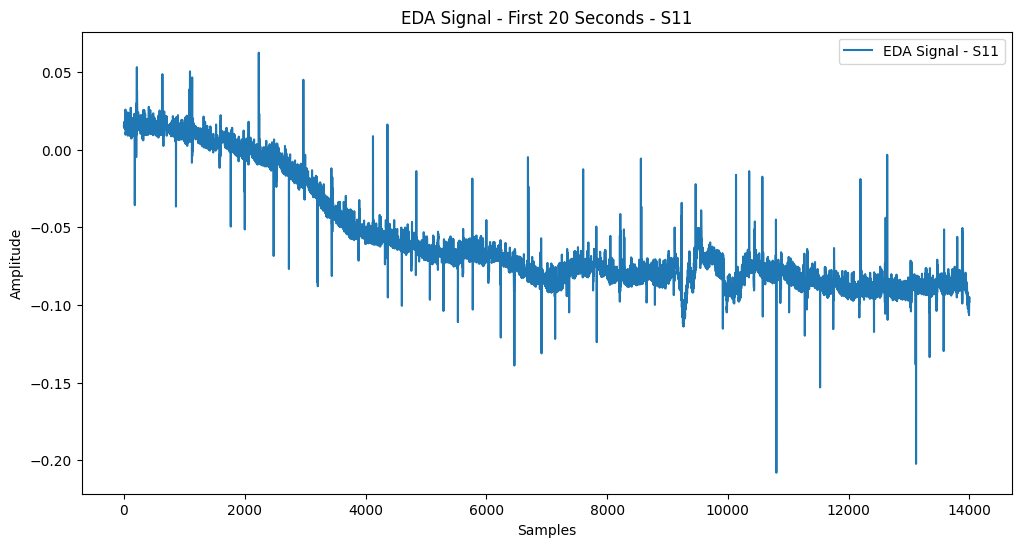

File WESAD/S12/S12_respiban.txt non trovato.


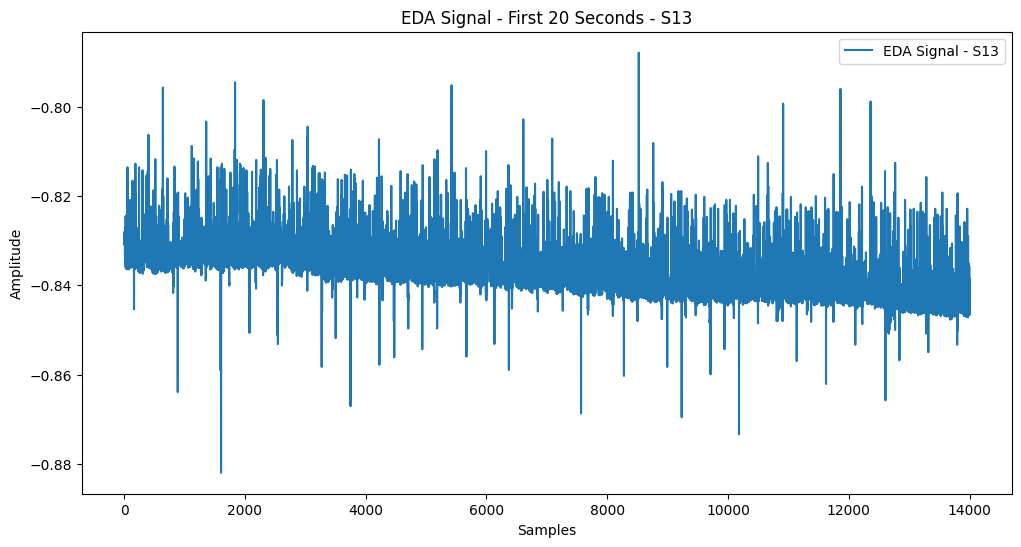

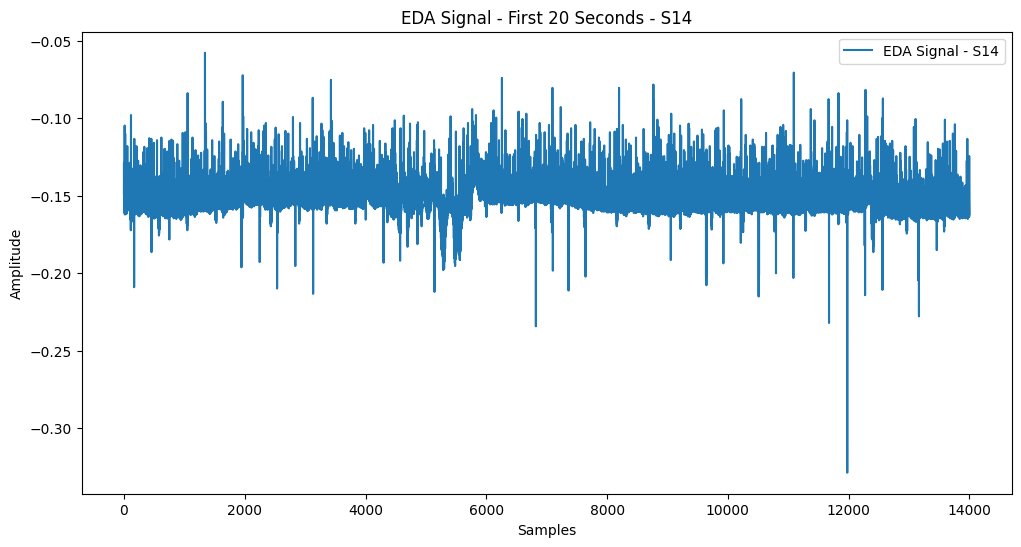

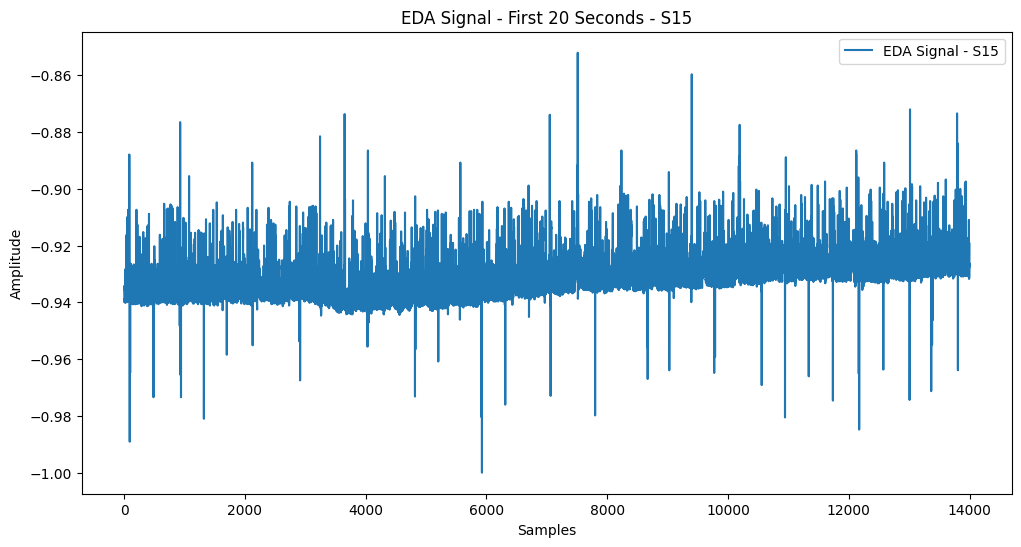

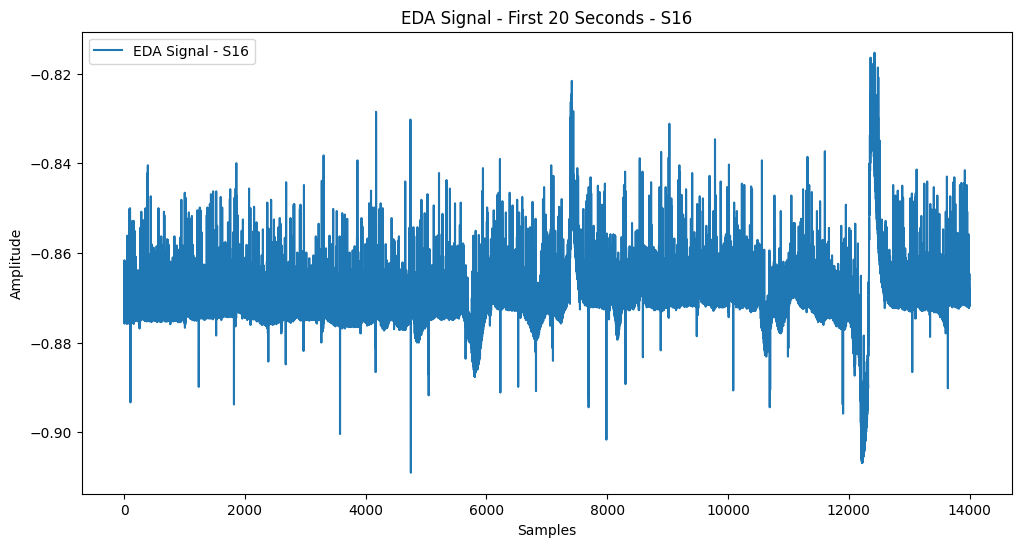

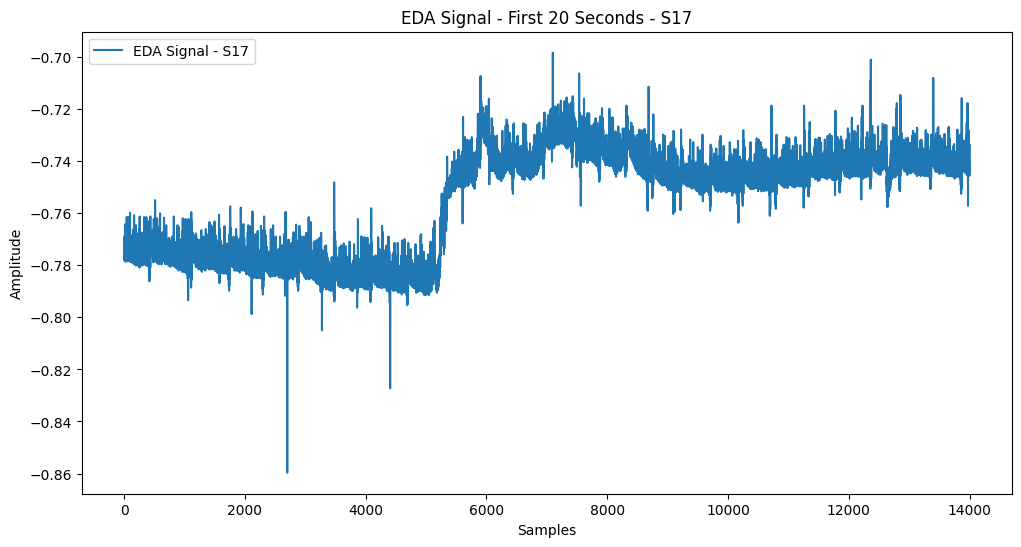

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler

def unprocess_data(file_path, fs=700, lowcut=0.5, highcut=45.0, duration=20):
    data = pd.read_csv(file_path, skiprows=3, delimiter='\t', usecols=range(2, 10))
    df_resp = pd.DataFrame(data)
    df_resp.columns = data.columns.str.strip()
    df_resp.columns = ["ECG", "EDA", "EMG", "TEMP", "XYZ_X", "XYZ_Y", "XYZ_Z", "RESPIRATION"]
    return df_resp

# Funzione per caricare, trasformare e applicare il filtro
def process_data(file_path, fs=700, lowcut=0.5, highcut=45.0, duration=20):
    # Leggi il file di dati
    data = pd.read_csv(file_path, skiprows=3, delimiter='\t', usecols=range(2, 10))
    df_resp = pd.DataFrame(data)
    df_resp.columns = data.columns.str.strip()
    df_resp.columns = ["ECG", "EDA", "EMG", "TEMP", "XYZ_X", "XYZ_Y", "XYZ_Z", "RESPIRATION"]

    # Trasformazioni per i vari segnali
    def transform_ecg(signal):
        return (signal / (2**16 - 0.5)) * 3

    def transform_eda(signal):
        return ((signal / 2**16) * 3) / 0.12

    def transform_emg(signal):
        return (signal / 2**16 - 0.5) * 3

    def transform_temp(signal):
        vout = (signal * 3) / (2**16 - 1)
        rntc = (10**4 * vout) / (3 - vout)
        return -273.15 + 1 / (1.12764514e-3 + 2.34282709e-4 * np.log(rntc) + 8.77303013e-8 * np.log(rntc)**3)

    def transform_xyz(signal):
        return (signal - 28000) / (38000 - 28000) * 2 - 1

    def transform_respiration(signal):
        return (signal / 2**16 - 0.5) * 100

    # Applicazione delle trasformazioni
    df_resp['ECG'] = transform_ecg(df_resp['ECG'])
    df_resp['EDA'] = transform_eda(df_resp['EDA'])
    df_resp['EMG'] = transform_emg(df_resp['EMG'])
    df_resp['TEMP'] = transform_temp(df_resp['TEMP'])
    df_resp['XYZ_X'] = transform_xyz(df_resp['XYZ_X'])
    df_resp['XYZ_Y'] = transform_xyz(df_resp['XYZ_Y'])
    df_resp['XYZ_Z'] = transform_xyz(df_resp['XYZ_Z'])
    df_resp['RESPIRATION'] = transform_respiration(df_resp['RESPIRATION'])

    # Funzione per il filtro passa banda
    def butter_bandpass(lowcut, highcut, fs, order=4):
        nyquist = 0.5 * fs
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
        return b, a

    def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
        b, a = butter_bandpass(lowcut, highcut, fs, order)
        y = filtfilt(b, a, data)
        return y

    # Applicazione del filtro
    df_resp['ECG'] = apply_bandpass_filter(df_resp['ECG'], lowcut, highcut, fs)
    df_resp['EMG'] = apply_bandpass_filter(df_resp['EMG'], lowcut, highcut, fs)

    # Normalizzazione dei dati
    scaler = MinMaxScaler(feature_range=(-1, 1))
    columns_to_normalize = ['ECG', 'EDA', 'EMG', 'TEMP', 'XYZ_X', 'XYZ_Y', 'XYZ_Z', 'RESPIRATION']
    df_resp[columns_to_normalize] = scaler.fit_transform(df_resp[columns_to_normalize])

    # Selezione dei dati per i primi 20 secondi
    num_samples = fs * duration
    df_20s = df_resp.iloc[:num_samples]

    return df_20s

# Directory contenente i file
file_dir = 'gdrive/My Drive/WESAD/'
# Itera su tutti i file da S02 a S17
for i in range(2, 18):
    # Crea il percorso del file per S02, S03, ..., S17
    file_path = os.path.join(file_dir, f'S{i}/S{i}_respiban.txt')

    if os.path.exists(file_path):  # Verifica che il file esista
        df_20s = process_data(file_path)

        # Plot dei dati EDA
        plt.figure(figsize=(12, 6))
        plt.plot(df_20s['EDA'], label=f'EDA Signal - S{i}')
        plt.title(f'EDA Signal - First 20 Seconds - S{i}')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()
    else:
        print(f"File {file_path} non trovato.")
# Itera su tutti i file da S02 a S17
for i in range(2, 18):
    # Crea il percorso del file per S02, S03, ..., S17
    file_path = os.path.join(file_dir, f'S{i}/S{i}_respiban.txt')

    if os.path.exists(file_path):  # Verifica che il file esista
        df_20s = unprocess_data(file_path)

        # Plot dei dati EDA
        plt.figure(figsize=(12, 6))
        plt.plot(df_20s['EDA'], label=f'EDA Signal - S{i}')
        plt.title(f'EDA Signal - First 20 Seconds unprocess- S{i}')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()
    else:
        print(f"File {file_path} non trovato.")


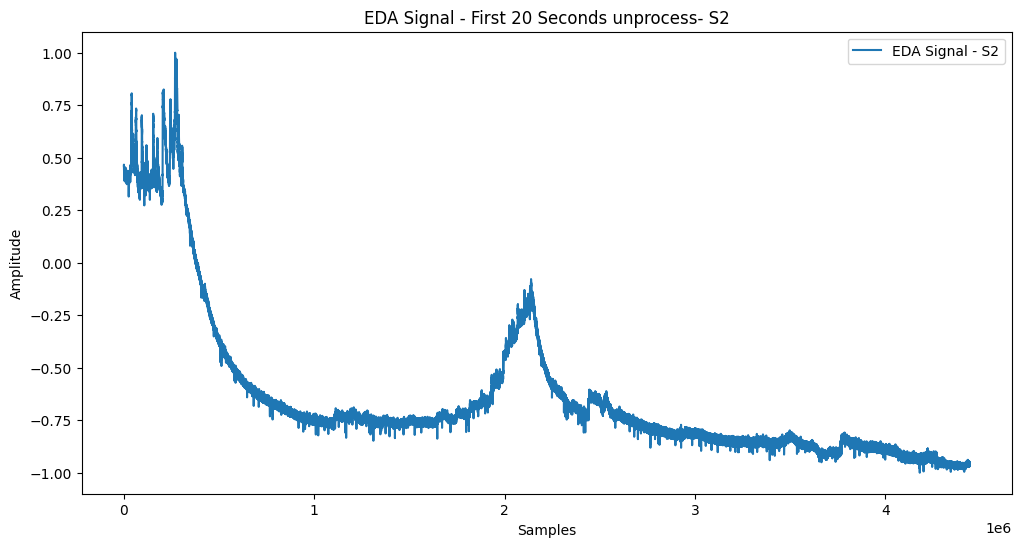

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


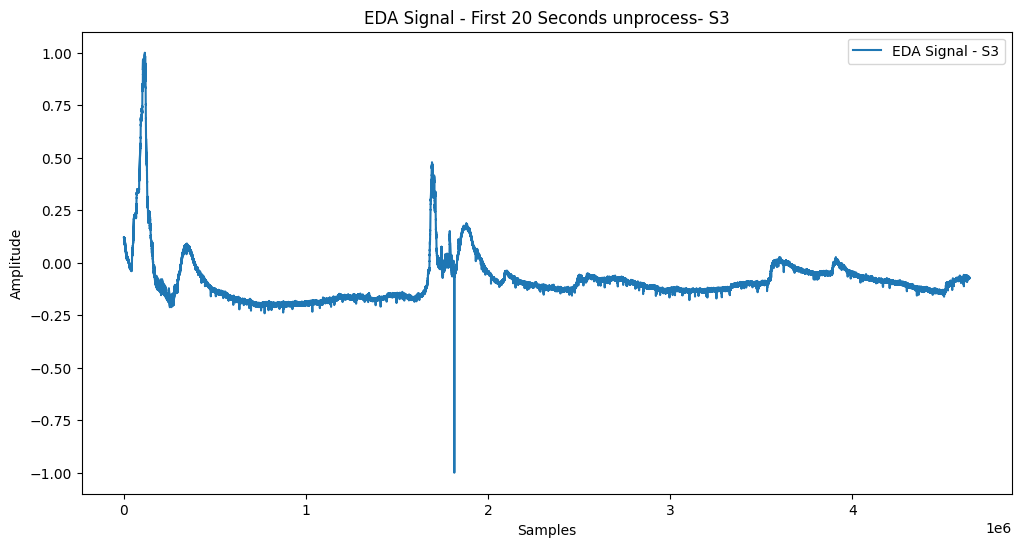

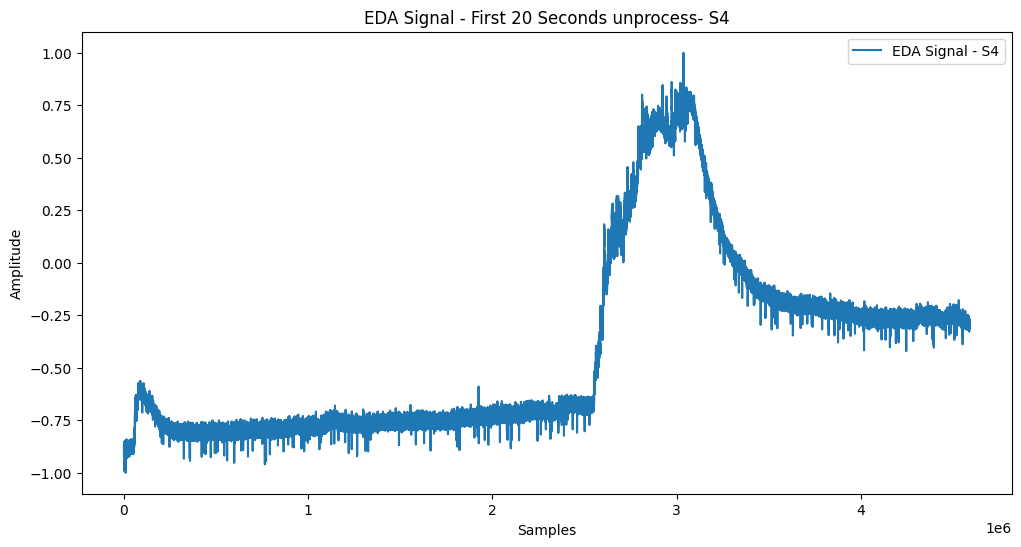

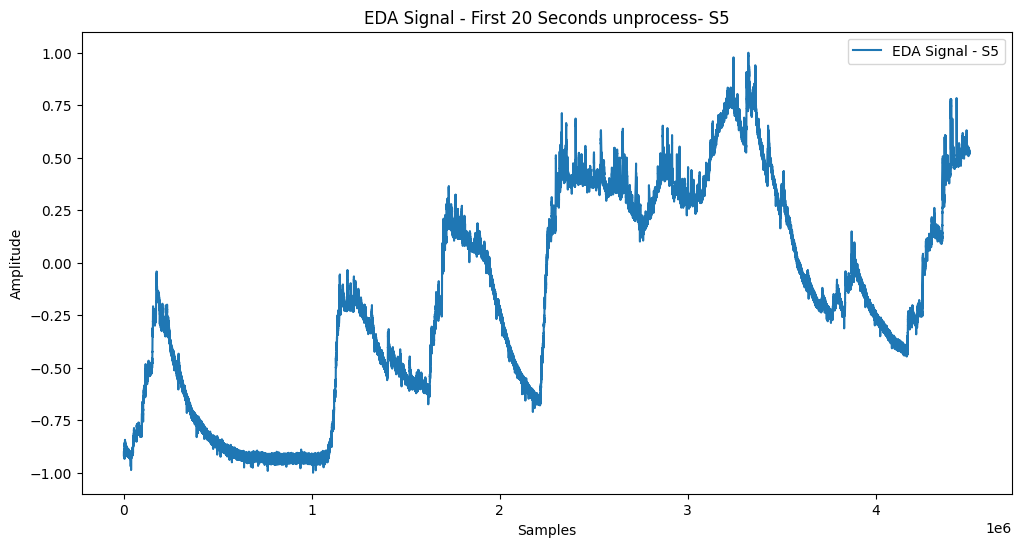

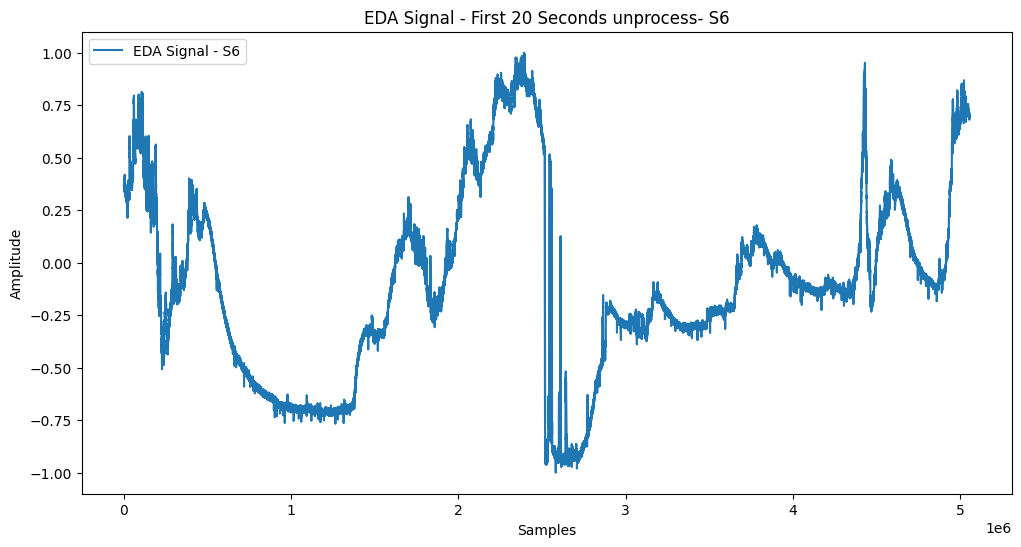

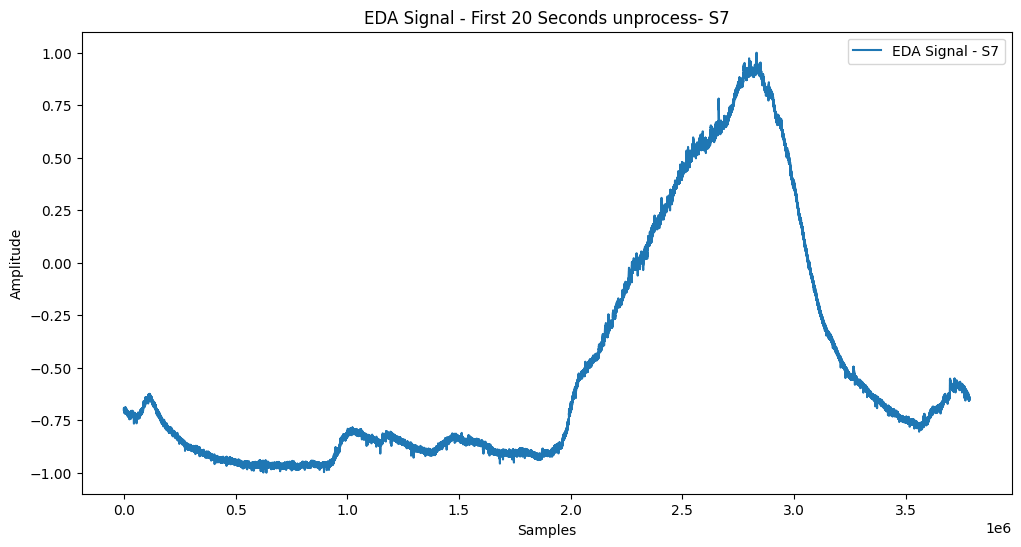

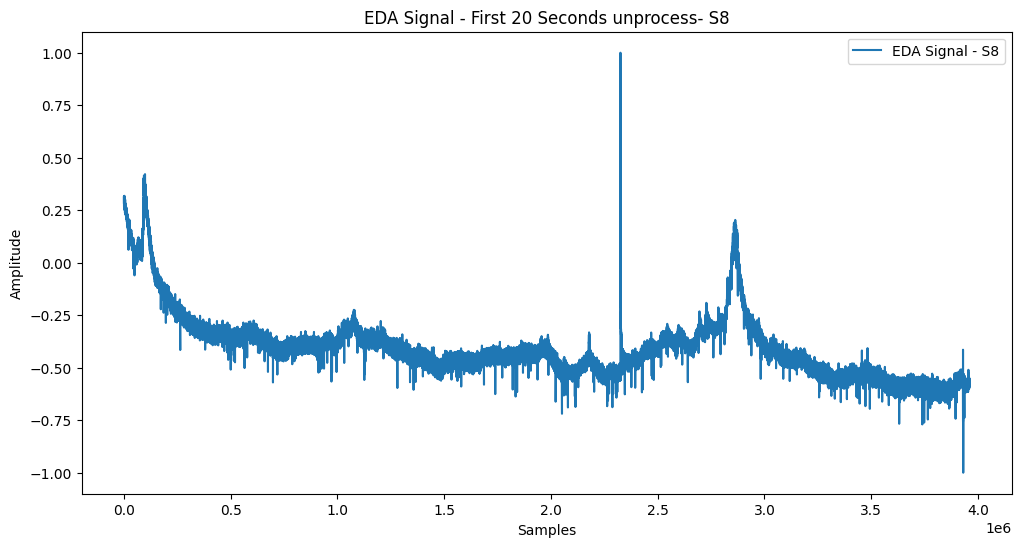

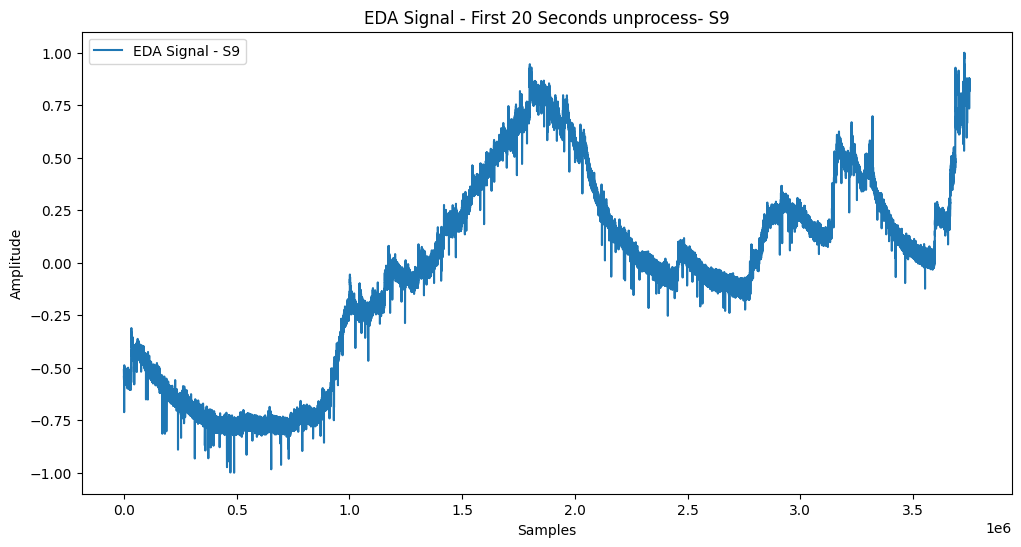

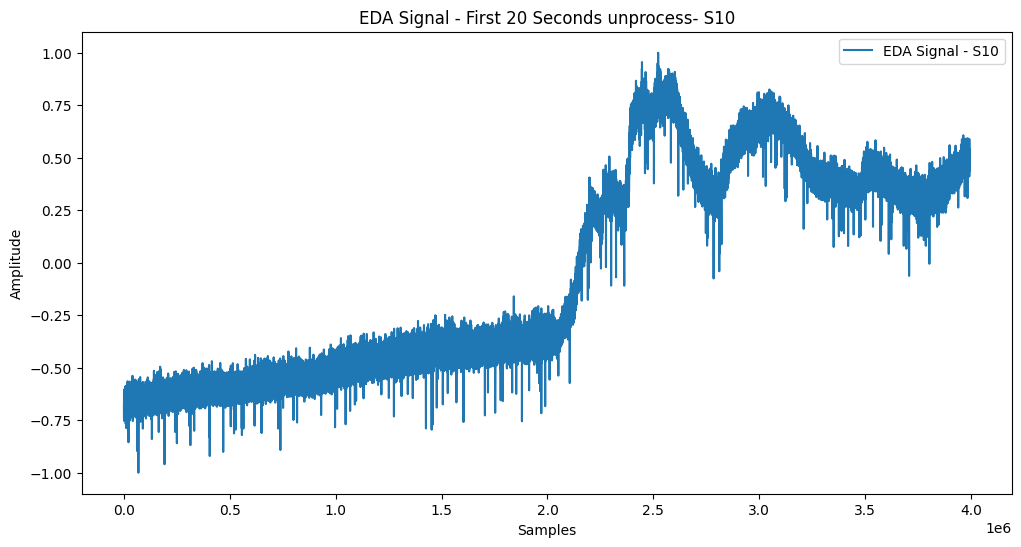

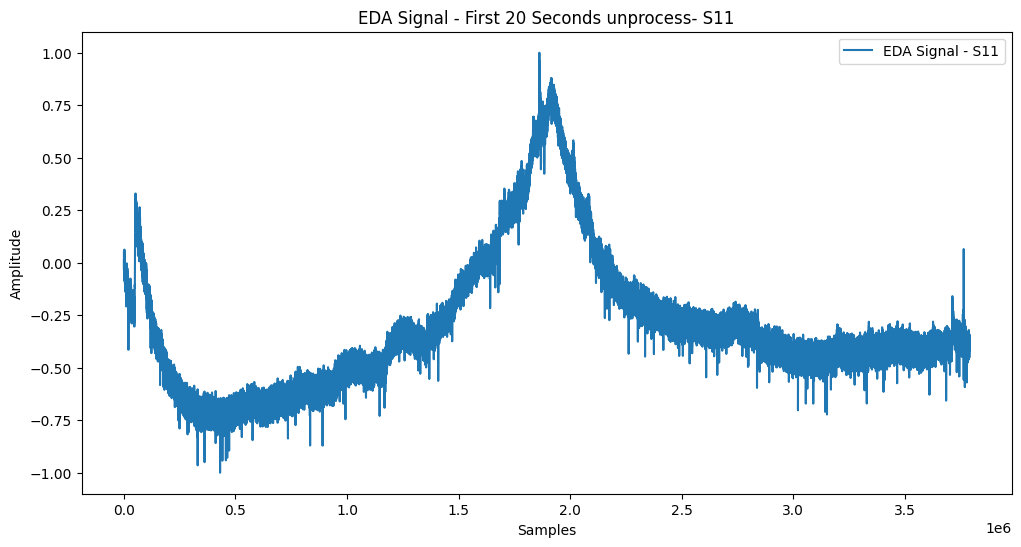

File WESAD/S12/S12_respiban.txt non trovato.


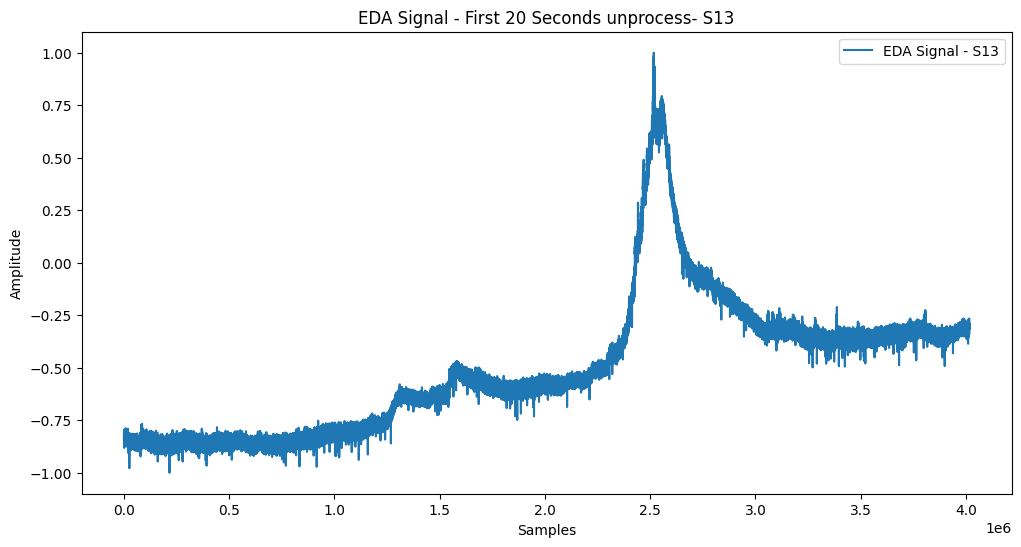

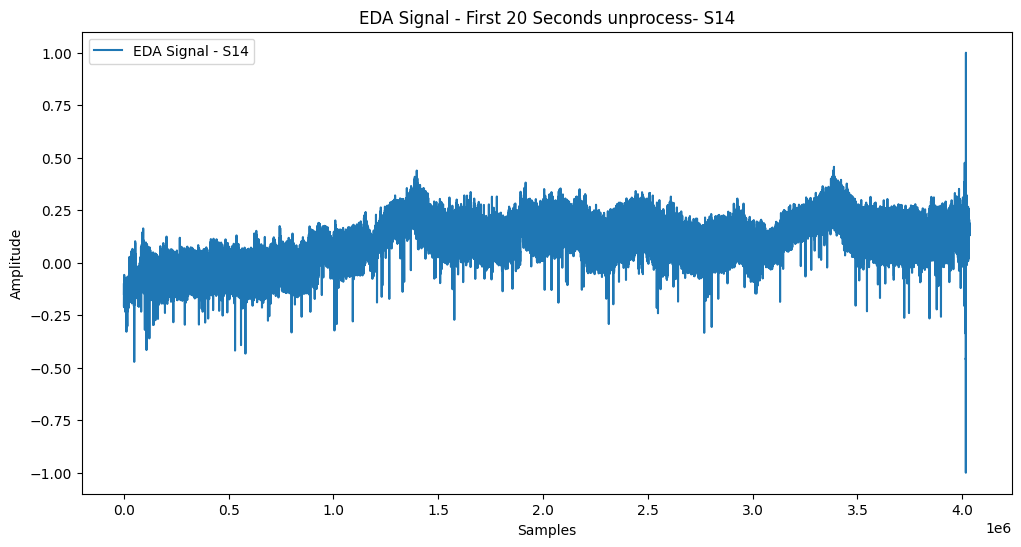

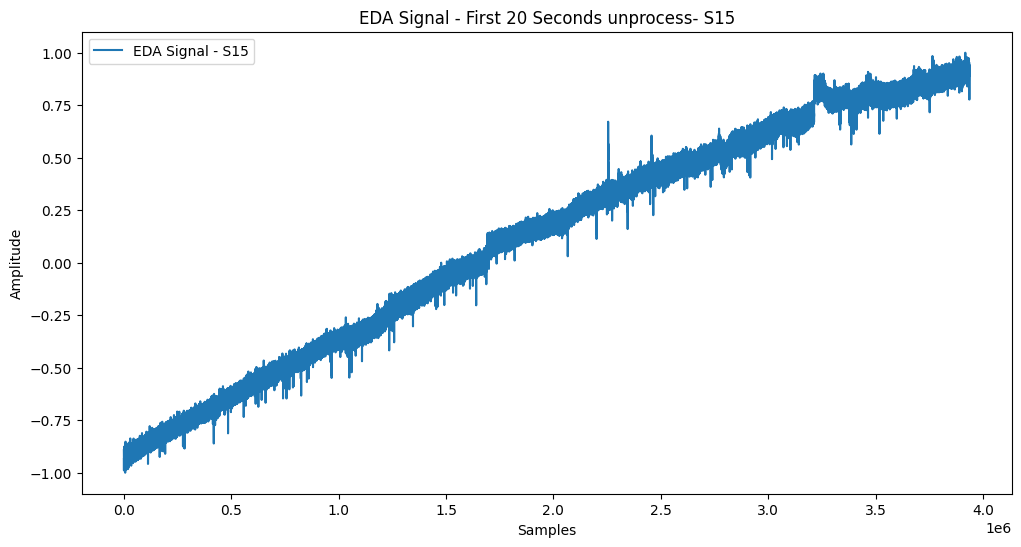

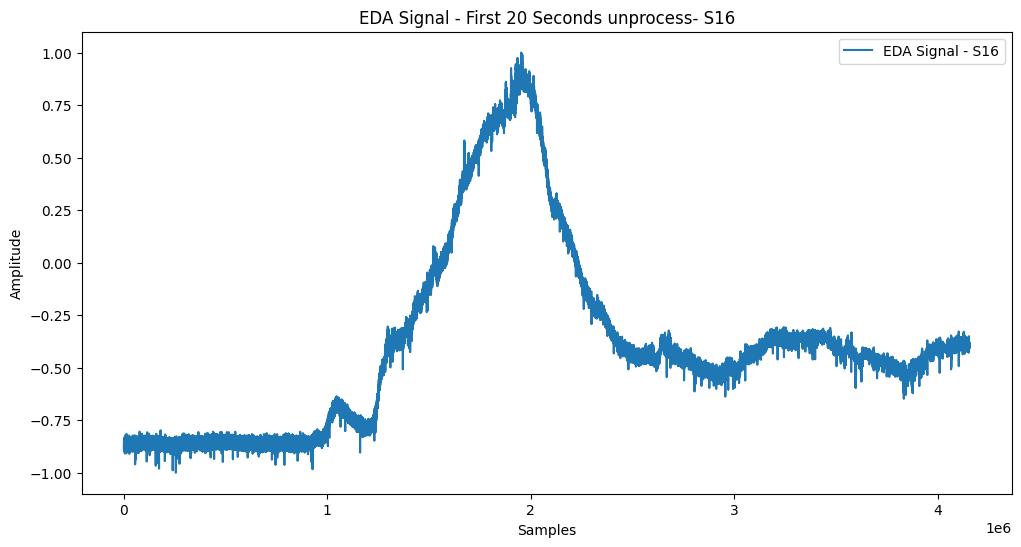

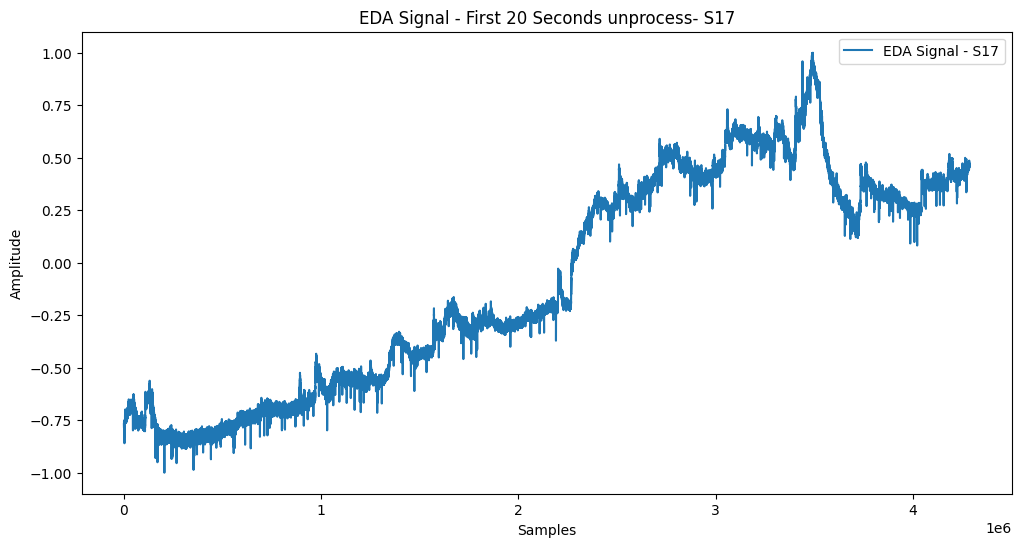

In [ ]:
#Codice per la prima parte di preprocessing

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler

def unprocess_data(file_path, fs=700, lowcut=0.5, highcut=45.0, duration=20):
    data = pd.read_csv(file_path, skiprows=3, delimiter='\t', usecols=range(2, 10))
    df_resp = pd.DataFrame(data)
    df_resp.columns = data.columns.str.strip()
    df_resp.columns = ["ECG", "EDA", "EMG", "TEMP", "XYZ_X", "XYZ_Y", "XYZ_Z", "RESPIRATION"]
    return df_resp

# Funzione per caricare, trasformare e applicare il filtro
def process_data(file_path, fs=700, lowcut=0.5, highcut=45.0, duration=20):
    # Leggi il file di dati
    data = pd.read_csv(file_path, skiprows=3, delimiter='\t', usecols=range(2, 10))
    df_resp = pd.DataFrame(data)
    df_resp.columns = data.columns.str.strip()
    df_resp.columns = ["ECG", "EDA", "EMG", "TEMP", "XYZ_X", "XYZ_Y", "XYZ_Z", "RESPIRATION"]

    # Trasformazioni per i vari segnali
    def transform_ecg(signal):
        return (signal / 2**16 - 0.5) * 3

    def transform_eda(signal):
        return ((signal / 2**16) * 3) / 0.12

    def transform_emg(signal):
        return (signal / 2**16 - 0.5) * 3

    def transform_temp(signal):
        vout = (signal * 3) / (2**16 - 1)
        rntc = (10**4 * vout) / (3 - vout)
        return -273.15 + 1 / (1.12764514e-3 + 2.34282709e-4 * np.log(rntc) + 8.77303013e-8 * np.log(rntc)**3)

    def transform_xyz(signal):
        return (signal - 28000) / (38000 - 28000) * 2 - 1

    def transform_respiration(signal):
        return (signal / 2**16 - 0.5) * 100

    # Applicazione delle trasformazioni
    df_resp['ECG'] = transform_ecg(df_resp['ECG'])
    df_resp['EDA'] = transform_eda(df_resp['EDA'])
    df_resp['EMG'] = transform_emg(df_resp['EMG'])
    df_resp['TEMP'] = transform_temp(df_resp['TEMP'])
    df_resp['XYZ_X'] = transform_xyz(df_resp['XYZ_X'])
    df_resp['XYZ_Y'] = transform_xyz(df_resp['XYZ_Y'])
    df_resp['XYZ_Z'] = transform_xyz(df_resp['XYZ_Z'])
    df_resp['RESPIRATION'] = transform_respiration(df_resp['RESPIRATION'])

    # Funzione per il filtro passa banda
    def butter_bandpass(lowcut, highcut, fs, order=4):
        nyquist = 0.5 * fs
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
        return b, a

    def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
        b, a = butter_bandpass(lowcut, highcut, fs, order)
        y = filtfilt(b, a, data)
        return y
    def butter_highpass(data,cutoff, fs, order=4):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='high')
        return filtfilt(b,a,data)
    def butter_lowwpass(data,cutoff,fs,order=4):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low')
        return filtfilt(b,a,data)
    # Applicazione del filtro
    fs=700
    ecg_cut=0.5
    emg_cut=10
    lowcut=0.5
    highcut=10
    df_resp['ECG']= apply_bandpass_filter(df_resp['ECG'], lowcut, highcut, fs)
    df_resp['EMG']= apply_bandpass_filter(df_resp['EMG'], lowcut, highcut, fs)
    #df_resp['ECG'] = butter_highpass(df_resp['ECG'], ecg_cut, fs)
    #df_resp['EMG'] = butter_lowwpass(df_resp['EMG'], emg_cut, fs)

    # Normalizzazione dei dati
    scaler = MinMaxScaler(feature_range=(-1, 1))
    columns_to_normalize = ['ECG', 'EDA', 'EMG', 'TEMP', 'XYZ_X', 'XYZ_Y', 'XYZ_Z', 'RESPIRATION']
    df_resp[columns_to_normalize] = scaler.fit_transform(df_resp[columns_to_normalize])

    # Selezione dei dati per i primi 20 secondi
    num_samples = fs * duration
    df_20s = df_resp.iloc[:num_samples]

    return df_resp

# Directory contenente i file
file_dir = 'gdrive/My Drive/WESAD/'

# Itera su tutti i file da S02 a S17
for i in range(2, 18):
    # Crea il percorso del file per S02, S03, ..., S17
    file_path = os.path.join(file_dir, f'S{i}/S{i}_respiban.txt')

    if os.path.exists(file_path):  # Verifica che il file esista
        df_20s = process_data(file_path)

        # Plot dei dati EDA
        plt.figure(figsize=(12, 6))
        plt.plot(df_20s['EDA'], label=f'EDA Signal - S{i}')
        plt.title(f'EDA Signal - First 20 Seconds unprocess- S{i}')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()
    else:
        print(f"File {file_path} non trovato.")


[4.36859131 4.37202454 4.38194275 ... 3.51028442 3.50608826 3.50456238]


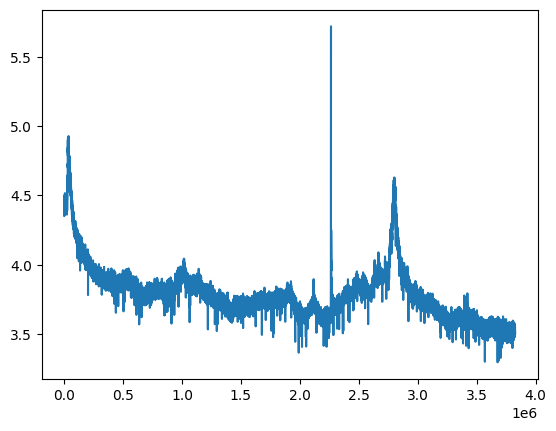

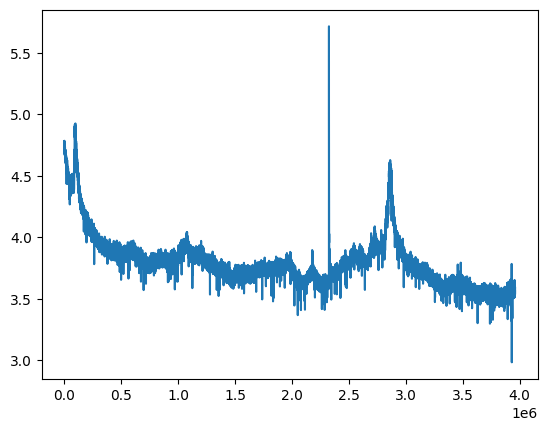

In [ ]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler

def transform_eda(signal):
  return ((signal / 2**16) * 3) / 0.12
with open('gdrive/My Drive/WESAD/S8/S8.pkl', 'rb') as file:
    data = pickle.load(file, encoding='latin1')  # or 'utf-8' if applicable

# Now 'data' contains the deserialized object
data_decoded=data['signal']['chest']['EDA'].flatten()
print(data_decoded)
num_samples = 700 * 20
df_20s = data_decoded[:num_samples]

data = pd.read_csv('gdrive/My Drive/WESAD/S8/S8_respiban.txt', skiprows=3, delimiter='\t', usecols=range(2, 10))
df_resp = pd.DataFrame(data)
df_resp.columns = data.columns.str.strip()
df_resp.columns = ["ECG", "EDA", "EMG", "TEMP", "XYZ_X", "XYZ_Y", "XYZ_Z", "RESPIRATION"]
df_resp['EDA'] = transform_eda(df_resp['EDA'])
plt.plot(data_decoded)
plt.show()
plt.plot(df_resp['EDA'])
plt.show()


[4.36859131 4.37202454 4.38194275 ... 3.51028442 3.50608826 3.50456238]


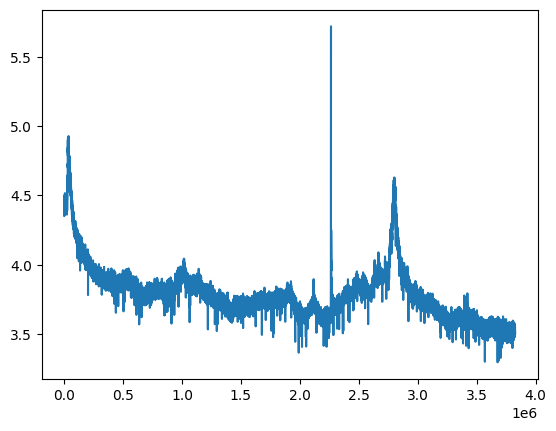

In [ ]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler
with open('gdrive/My Drive/WESAD/S8/S8.pkl', 'rb') as file:
    data = pickle.load(file, encoding='latin1')  # or 'utf-8' if applicable

# Now 'data' contains the deserialized object
data_decoded=data['signal']['chest']['EDA'].flatten()
print(data_decoded)
num_samples = 700 * 20
df_20s = data_decoded[:num_samples]
plt.plot(data_decoded)
plt.show()

In [ ]:
# Code to extract labels
def time_to_tick(time_str: str):
    time_comp = list(map(int, time_str.split('.')))
    return time_comp[0] * 60 * 700 + (time_comp[0] * 700 if len(time_comp) > 1 else 0)

with open('gdrive/My Drive/WESAD/S10/S10_quest.csv', 'r') as quest:
    lines = quest.readlines()
    start = lines[2].split(';', 9)[1:-4]
    end = lines[3].split(';', 9)[1:-4]
    start = list(map(time_to_tick, start))
    end = list(map(time_to_tick, end))
    print(start, end)

data = pd.read_csv('gdrive/My Drive/WESAD/S10/S10_respiban.txt', skiprows=3, delimiter='\t', usecols=range(0, 10))

data.columns = ["TICK", "ignore", "ECG", "EDA", "EMG", "TEMP", "XYZ_X", "XYZ_Y", "XYZ_Z", "RESPIRATION"]
data.drop('ignore', axis='columns', inplace=True)
# print(data.info())

labeled = data[((data.TICK >= start[0]) & (data.TICK <= end[0])) |
               ((data.TICK >= start[1]) & (data.TICK <= end[1])) |
               ((data.TICK >= start[2]) & (data.TICK <= end[2])) |
               ((data.TICK >= start[3]) & (data.TICK <= end[3])) |
               ((data.TICK >= start[4]) & (data.TICK <= end[4]))]
# labeled.describe()

labels = (['base'] * (end[0] - start[0] + 1) +
         ['fun'] * (end[1] - start[1] + 1) +
         ['medi'] * (end[2] - start[2] + 1) +
         ['stress'] * (end[3] - start[3] + 1) +
         ['medi'] * (end[4] - start[4] + 1))
labeled = labeled.assign(LABEL=labels)
labeled.describe()

[85400, 1152900, 1622600, 2305800, 3544100] [939400, 1451800, 1921500, 2818200, 3843000]


<ipython-input-33-d2da441bc31d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled['LABEL'] = labels


,TICK,ECG,EDA,EMG,TEMP,XYZ_X,XYZ_Y,XYZ_Z,RESPIRATION
count,2.263105e+06,2.263105e+06,2.263105e+06,2.263105e+06,2.263105e+06,2.263105e+06,2.263105e+06,2.263105e+06,2.263105e+06
mean,1.667315e+06,3.279506e+04,3.094853e+03,3.271236e+04,2.609863e+04,3.685748e+04,3.315650e+04,3.100889e+04,3.280074e+04
std,1.129912e+06,3.255402e+03,1.201665e+03,1.937383e+02,3.224381e+02,5.384578e+02,2.524549e+02,1.551883e+03,2.213222e+03
min,8.540000e+04,3.986000e+03,1.188000e+03,2.981900e+04,2.539300e+04,3.556400e+04,3.152300e+04,2.891600e+04,2.014900e+04
25%,6.511760e+05,3.184100e+04,2.099000e+03,3.260100e+04,2.590300e+04,3.647900e+04,3.309800e+04,2.983600e+04,3.140400e+04
50%,1.430451e+06,3.318300e+04,2.474000e+03,3.272900e+04,2.623700e+04,3.677300e+04,3.318000e+04,3.030300e+04,3.256500e+04
75%,2.551325e+06,3.397500e+04,4.296000e+03,3.283500e+04,2.632500e+04,3.744400e+04,3.331900e+04,3.235300e+04,3.422000e+04
max,3.843000e+06,6.507100e+04,5.919000e+03,3.560500e+04,2.676600e+04,4.038400e+04,3.525200e+04,3.537100e+04,4.666300e+04
